# The importance of characters in Star Wars Episode 3

In [1]:
# Importing libraries
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="nxviz")
import numpy as np
import pandas as pd
import json
import networkx as nx
import matplotlib.pyplot as plt
from nxviz import annotate
from nxviz import nodes
from nxviz import edges
from nxviz.plots import aspect_equal, despine
from matplotlib.colors import LinearSegmentedColormap

### Network building <a id="NETBUILD"></a>

In [2]:
# We will use the NetworkX and create the graphs for the first movie. First, let's make the graphs and populate them with the nodes and edges from episode 3.
# To start, we will load the files that contain the network information.

In [3]:
with open('data/starwars-episode-3-interactions.json') as f:
    data_interactions = json.load(f)
print(data_interactions['nodes'][0])
print(data_interactions['links'][0])

{'name': 'ANAKIN', 'value': 53, 'colour': '#ce3b59'}
{'source': 0, 'target': 1, 'value': 28}


In [4]:
with open('data/starwars-episode-3-mentions.json') as f:
    data_mentions = json.load(f)
print(data_mentions['nodes'][0])
print(data_mentions['links'][0])

{'name': 'EMPEROR', 'value': 62, 'colour': '#4a45f5'}
{'source': 1, 'target': 0, 'value': 9}


In [5]:
with open('data/starwars-episode-3-interactions-allCharacters.json') as f:
    data_all = json.load(f)
print(data_all['nodes'][0])
print(data_all['links'][0])

{'name': 'R2-D2', 'value': 31, 'colour': '#bde0f6'}
{'source': 5, 'target': 0, 'value': 2}


In [6]:
#  Let's create a function to help make the graphs
def create_graph(data):
    G = nx.Graph()

    #build graph nodes
    for node in data['nodes']:
        G.add_node(node['name'])
        G.nodes[node['name']]['colour'] = node['colour']
        G.nodes[node['name']]['scenes'] = node['value']
        G.nodes[node['name']]['name'] = node['name']
    
    #build graph edges
    for edge in data['links']:
        G.add_edge(data['nodes'][edge['source']]['name'], data['nodes'][edge['target']]['name'], weight=edge['value'])
    
    return G

In [7]:
# Now we will build the graphs, and to make our code more manageable, we will create a vector to store them
G_interactions = create_graph(data_interactions)
G_mentions = create_graph(data_mentions)
G_all = create_graph(data_all)
G = [G_interactions, G_mentions, G_all]

### Exploratory Data Analysis <a id="INTRO"></a>

In [8]:
# Let's see the number of nodes (number of characters) and links in our networks.
print('Data from the Interactions Network')
print('Number of nodes: ', G[0].number_of_nodes())
print('Number of links:', G[0].number_of_edges())

Data from the Interactions Network
Number of nodes:  23
Number of links: 57


In [9]:
print('Data from the Mentions Network')
print('Number of nodes: ', G[1].number_of_nodes())
print('Number of links:', G[1].number_of_edges())

Data from the Mentions Network
Number of nodes:  35
Number of links: 169


In [10]:
print('Data from the Merge Network')
print('Number of nodes: ', G[2].number_of_nodes())
print('Number of links:', G[2].number_of_edges())

Data from the Merge Network
Number of nodes:  24
Number of links: 65


In [11]:
G[0].nodes(data=True)

NodeDataView({'ANAKIN': {'colour': '#ce3b59', 'scenes': 53, 'name': 'ANAKIN'}, 'OBI-WAN': {'colour': '#48D1CC', 'scenes': 59, 'name': 'OBI-WAN'}, 'ODD BALL': {'colour': '#808080', 'scenes': 4, 'name': 'ODD BALL'}, 'GENERAL GRIEVOUS': {'colour': '#808080', 'scenes': 12, 'name': 'GENERAL GRIEVOUS'}, 'EMPEROR': {'colour': '#191970', 'scenes': 24, 'name': 'EMPEROR'}, 'COUNT DOOKU': {'colour': '#808080', 'scenes': 2, 'name': 'COUNT DOOKU'}, 'BAIL ORGANA': {'colour': '#808080', 'scenes': 20, 'name': 'BAIL ORGANA'}, 'C-3PO': {'colour': '#FFD700', 'scenes': 15, 'name': 'C-3PO'}, 'PADME': {'colour': '#DDA0DD', 'scenes': 23, 'name': 'PADME'}, 'YODA': {'colour': '#9ACD32', 'scenes': 23, 'name': 'YODA'}, 'FANG ZAR': {'colour': '#808080', 'scenes': 3, 'name': 'FANG ZAR'}, 'MON MOTHMA': {'colour': '#808080', 'scenes': 3, 'name': 'MON MOTHMA'}, 'GIDDEAN DANU': {'colour': '#808080', 'scenes': 2, 'name': 'GIDDEAN DANU'}, 'MACE WINDU': {'colour': '#808080', 'scenes': 7, 'name': 'MACE WINDU'}, 'CAPTAIN T

In [12]:
# Let's take a look at some data.
G[1].nodes(data=True)

NodeDataView({'EMPEROR': {'colour': '#4a45f5', 'scenes': 62, 'name': 'EMPEROR'}, 'COUNT DOOKU': {'colour': '#4a45f5', 'scenes': 14, 'name': 'COUNT DOOKU'}, 'OBI-WAN': {'colour': '#0000FF', 'scenes': 108, 'name': 'OBI-WAN'}, 'R2-D2': {'colour': '#FFFF00', 'scenes': 40, 'name': 'R2-D2'}, 'ANAKIN': {'colour': '#FF00FF', 'scenes': 105, 'name': 'ANAKIN'}, 'GENERAL GRIEVOUS': {'colour': '#4a45f5', 'scenes': 35, 'name': 'GENERAL GRIEVOUS'}, 'RED LEADER': {'colour': '#4a45f5', 'scenes': 3, 'name': 'RED LEADER'}, 'ODD BALL': {'colour': '#4a45f5', 'scenes': 4, 'name': 'ODD BALL'}, 'C-3PO': {'colour': '#00FFFF', 'scenes': 20, 'name': 'C-3PO'}, 'BAIL ORGANA': {'colour': '#4a45f5', 'scenes': 28, 'name': 'BAIL ORGANA'}, 'MACE WINDU': {'colour': '#4a45f5', 'scenes': 10, 'name': 'MACE WINDU'}, 'JAR JAR': {'colour': '#C0C0C0', 'scenes': 4, 'name': 'JAR JAR'}, 'PADME': {'colour': '#4a45f5', 'scenes': 40, 'name': 'PADME'}, 'YODA': {'colour': '#4a45f5', 'scenes': 35, 'name': 'YODA'}, 'MON MOTHMA': {'colou

In [13]:
G[2].nodes(data=True)

NodeDataView({'R2-D2': {'colour': '#bde0f6', 'scenes': 31, 'name': 'R2-D2'}, 'ANAKIN': {'colour': '#ce3b59', 'scenes': 54, 'name': 'ANAKIN'}, 'OBI-WAN': {'colour': '#48D1CC', 'scenes': 60, 'name': 'OBI-WAN'}, 'ODD BALL': {'colour': '#808080', 'scenes': 5, 'name': 'ODD BALL'}, 'GENERAL GRIEVOUS': {'colour': '#808080', 'scenes': 13, 'name': 'GENERAL GRIEVOUS'}, 'EMPEROR': {'colour': '#191970', 'scenes': 25, 'name': 'EMPEROR'}, 'COUNT DOOKU': {'colour': '#808080', 'scenes': 3, 'name': 'COUNT DOOKU'}, 'BAIL ORGANA': {'colour': '#808080', 'scenes': 21, 'name': 'BAIL ORGANA'}, 'C-3PO': {'colour': '#FFD700', 'scenes': 16, 'name': 'C-3PO'}, 'PADME': {'colour': '#DDA0DD', 'scenes': 24, 'name': 'PADME'}, 'YODA': {'colour': '#9ACD32', 'scenes': 24, 'name': 'YODA'}, 'FANG ZAR': {'colour': '#808080', 'scenes': 4, 'name': 'FANG ZAR'}, 'MON MOTHMA': {'colour': '#808080', 'scenes': 4, 'name': 'MON MOTHMA'}, 'GIDDEAN DANU': {'colour': '#808080', 'scenes': 3, 'name': 'GIDDEAN DANU'}, 'MACE WINDU': {'col

### Data Visualization <a id="DATAVIS"></a>

In [14]:
# We will use the data visualization section to show how we can visualize our three networks in different ways using the libraries presented in section
# Let's start by creating some helper functions for plots and visualizations
# Draw a graph using NetworkX
def draw_one_graph(G, title, size=12):
    fig, ax = plt.subplots(figsize=(size, size))
    pos = nx.kamada_kawai_layout(G)

    # nodes
    options = {"edgecolors": "tab:gray", "node_size": 800, "alpha": 0.5}
    nx.draw_networkx_nodes(G, pos, node_color="tab:green", **options)

    # edges
    nx.draw_networkx_edges(G, pos, width=.7, alpha=0.3)

    #labels
    nx.draw_networkx_labels(G,pos, font_size=10)

    plt.tight_layout()
    plt.title(title, fontsize=20)
    plt.axis("off")
    plt.show()
    

# Draws a graph with a circle structure using the nxviz library
def draw_circle_graph(G, title, size=12):
    fig, ax = plt.subplots(figsize=(size, size))
    pos = nodes.circos(G, group_by="name", color_by="colour")
    edges.circos(G, pos)
    annotate.circos_group(G, group_by="name")
    despine()
    aspect_equal()
    
# Draws a graph arranging nodes in a line and edges as arcs (using the nxviz library)
def draw_arc_graph(G, title, size=12):
    fig, ax = plt.subplots(figsize=(size, size))
    pos = nodes.arc(G, group_by="name", color_by="colour")
    edges.arc(G, pos)
    annotate.arc_group(G, group_by="name")
    despine()
    aspect_equal()
    
# Draw a graph with all the nodes and edges features
def draw_graph_with_features(G, size):
    # Extract node attributes: size is proportional to 'scenes'
    node_sizes = [
        (data['scenes'] / max(nx.get_node_attributes(G, 'scenes').values()) * 500) * 3
        if data['scenes'] > 20 else 50 * 3
        for _, data in G.nodes(data=True)]

    # Extract node colors: use 'colour' attribute if available
    node_colors = [
        data['colour'] if 'colour' in data else "gray"
        for _, data in G.nodes(data=True)]

    # Extract edge attributes: normalize 'weight' for width and color mapping
    edge_weights = np.array([data['weight'] for _, _, data in G.edges(data=True)])
    if len(edge_weights) > 0:  # Avoid division by zero if no edges exist
        edge_weights_normalized = (edge_weights - edge_weights.min()) / (edge_weights.max() - edge_weights.min() + 1e-6)
    else:
        edge_weights_normalized = edge_weights

    edge_widhts = [max(weight * 10, 0.5) for weight in edge_weights_normalized]

    # Create a colormap for edges
    cmap = LinearSegmentedColormap.from_list("edge_cmap", ["lightblue", "midnightblue"])
    #edge_colors = [cmap(weight) for weight in edge_weights_normalized]
    edge_colors = [cmap(weight)[:3] + (0.8,) for weight in edge_weights_normalized]  

    pos = nx.circular_layout(G)

    # Draw the graph
    fig, ax = plt.subplots(figsize=(size, size))

    # Draw nodes
    nx.draw_networkx_nodes(
        G, pos,
        node_size=node_sizes,
        node_color=node_colors,
        edgecolors="green",
        alpha=0.6)

    # Draw edges
    nx.draw_networkx_edges(
        G, pos,
        #width=edge_weights_normalized * 20,
        width=edge_widhts,
        edge_color=[(r, g, b, 0.6) for r, g, b, _ in edge_colors])

    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

    plt.axis("off")
    plt.show()

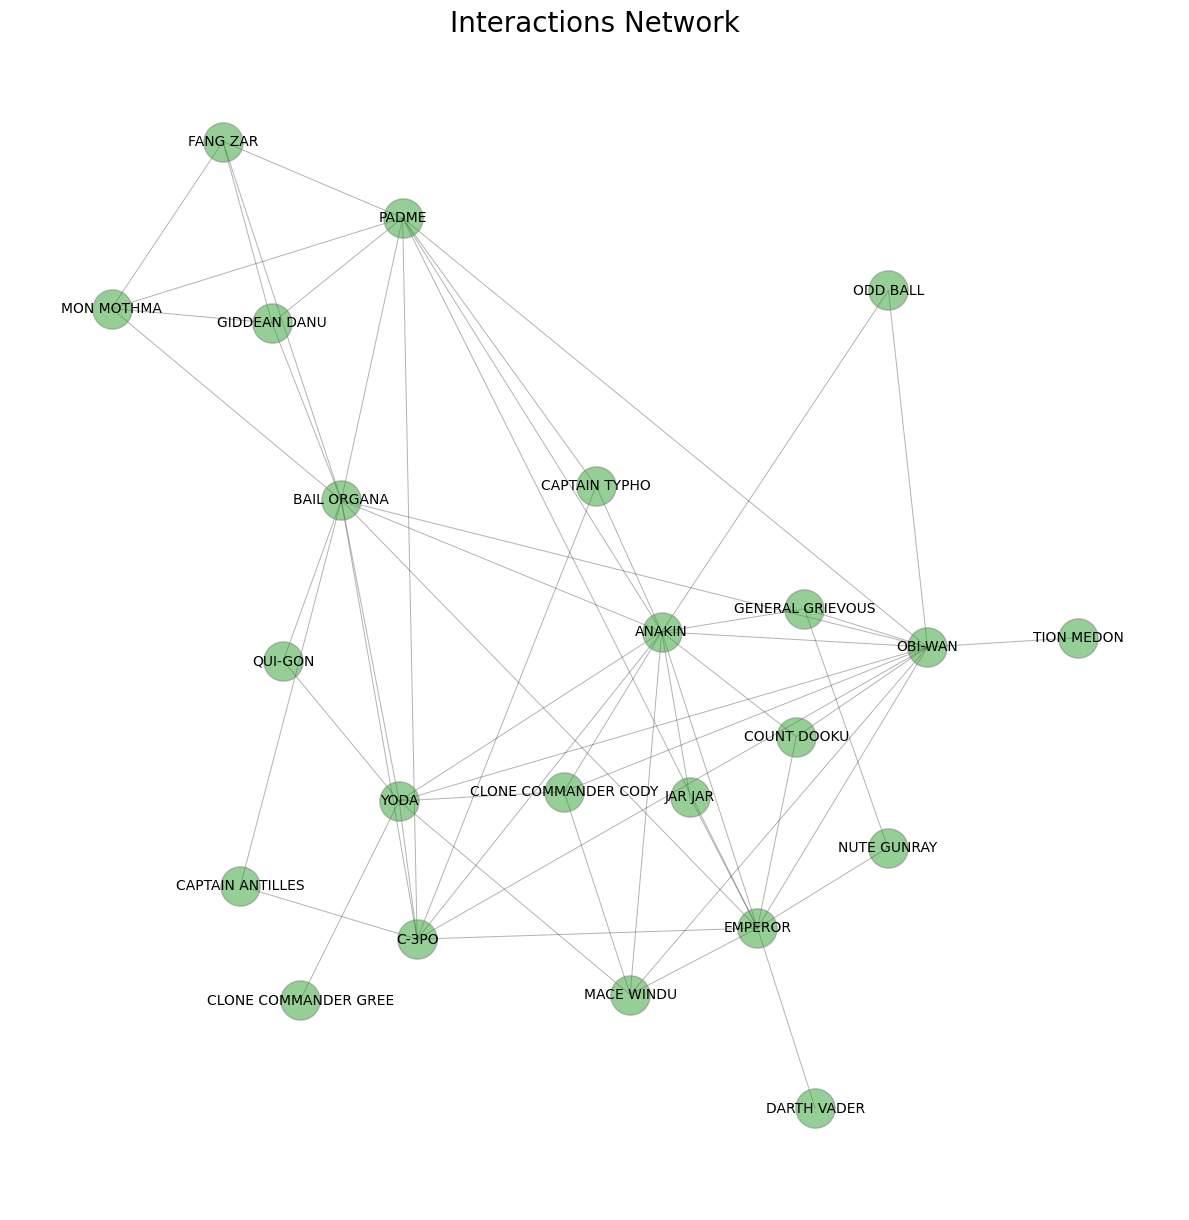

In [15]:
draw_one_graph(G[0], 'Interactions Network')

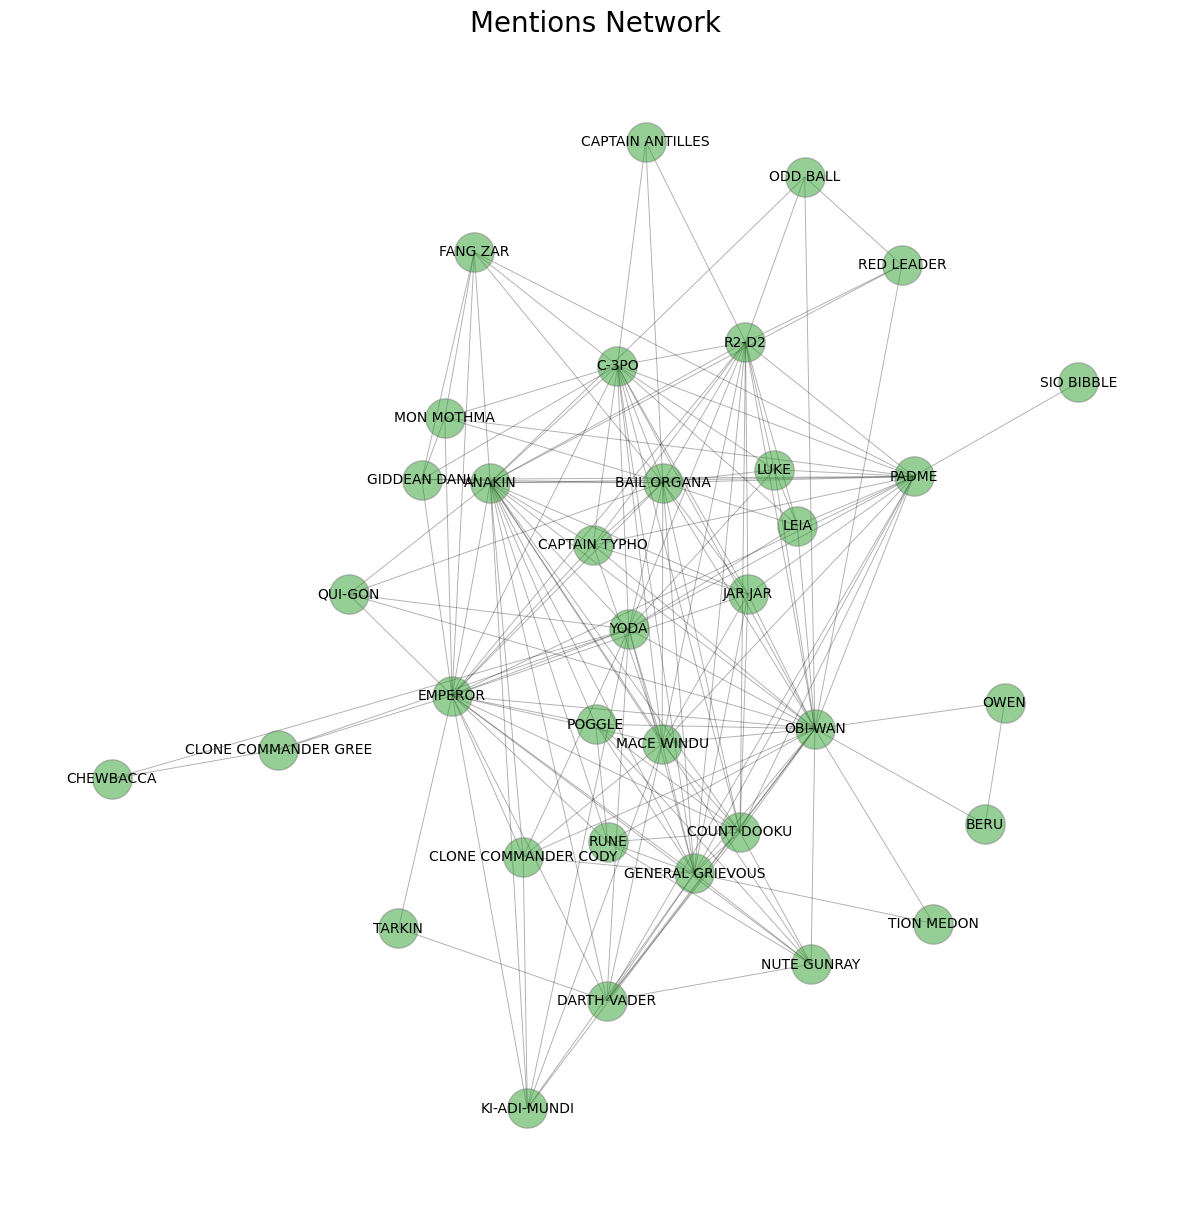

In [16]:
draw_one_graph(G[1], 'Mentions Network')

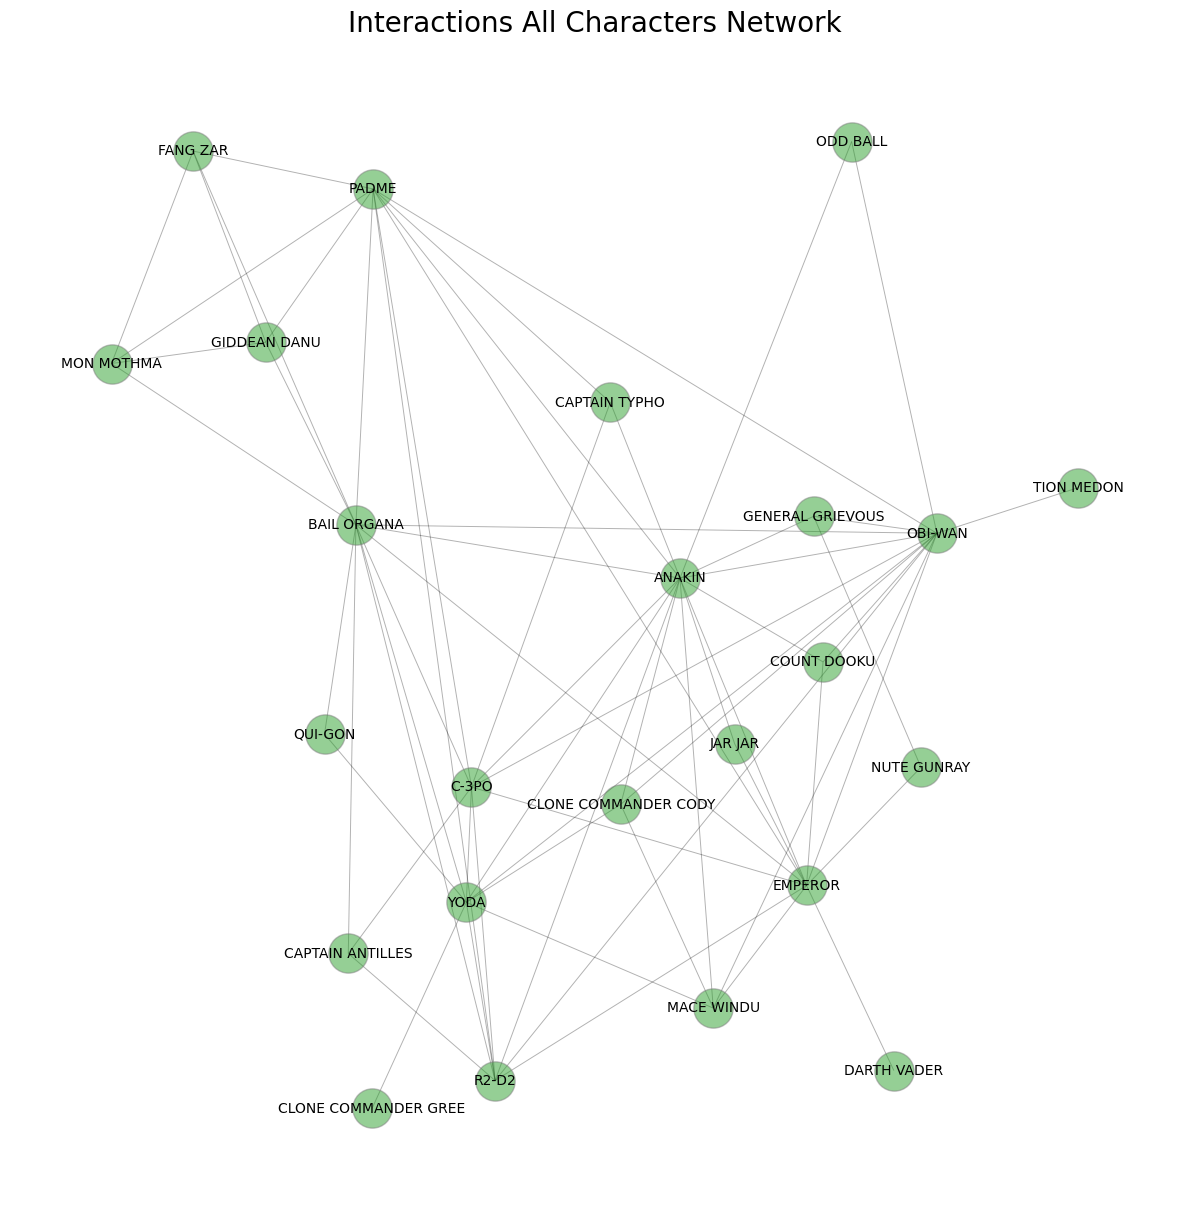

In [17]:
draw_one_graph(G[2], 'Interactions All Characters Network')

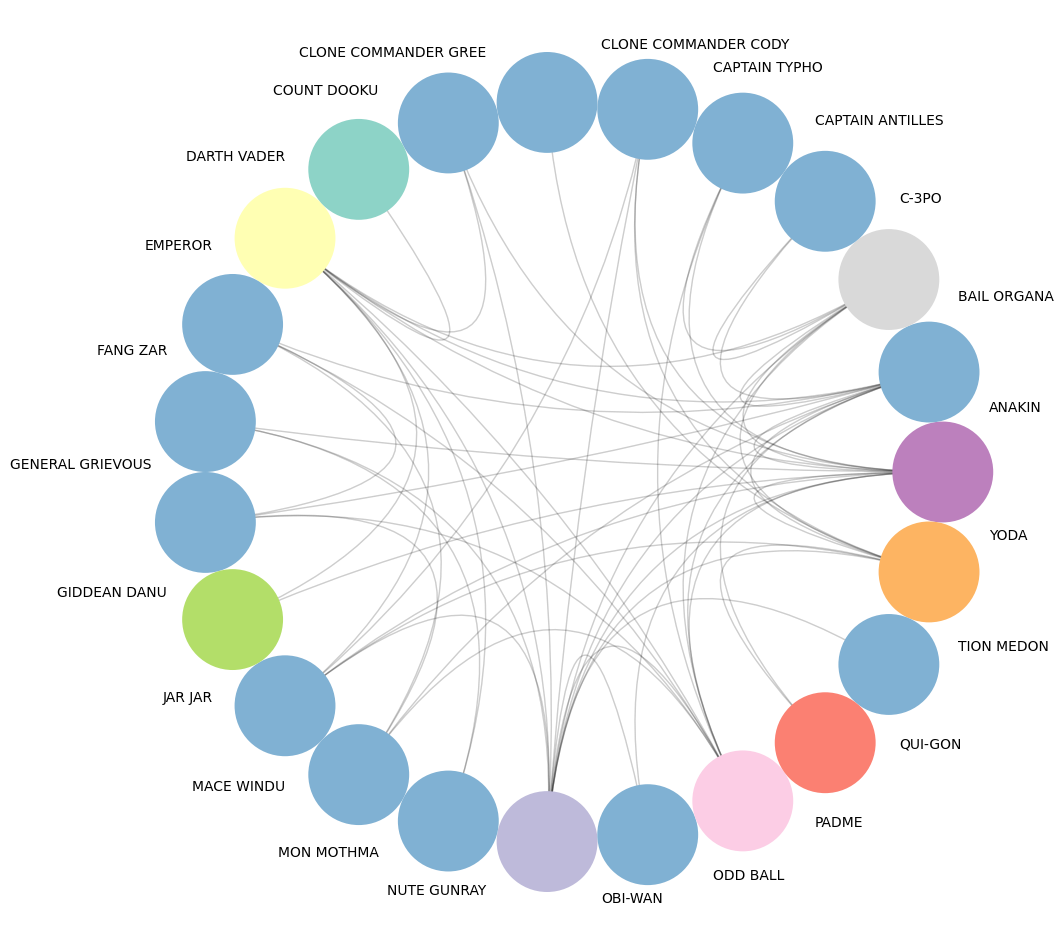

In [18]:
draw_circle_graph(G[0], 'Interactions Network')

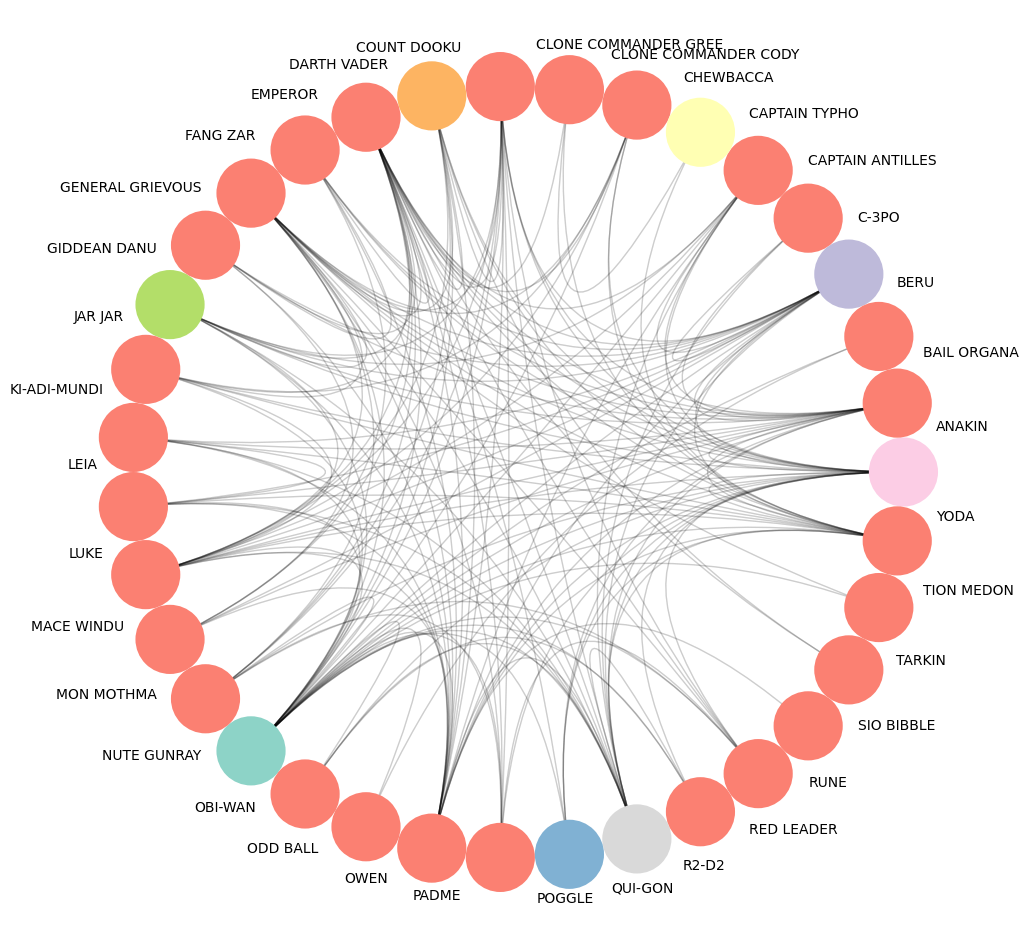

In [19]:
draw_circle_graph(G[1], 'Mentions Network')

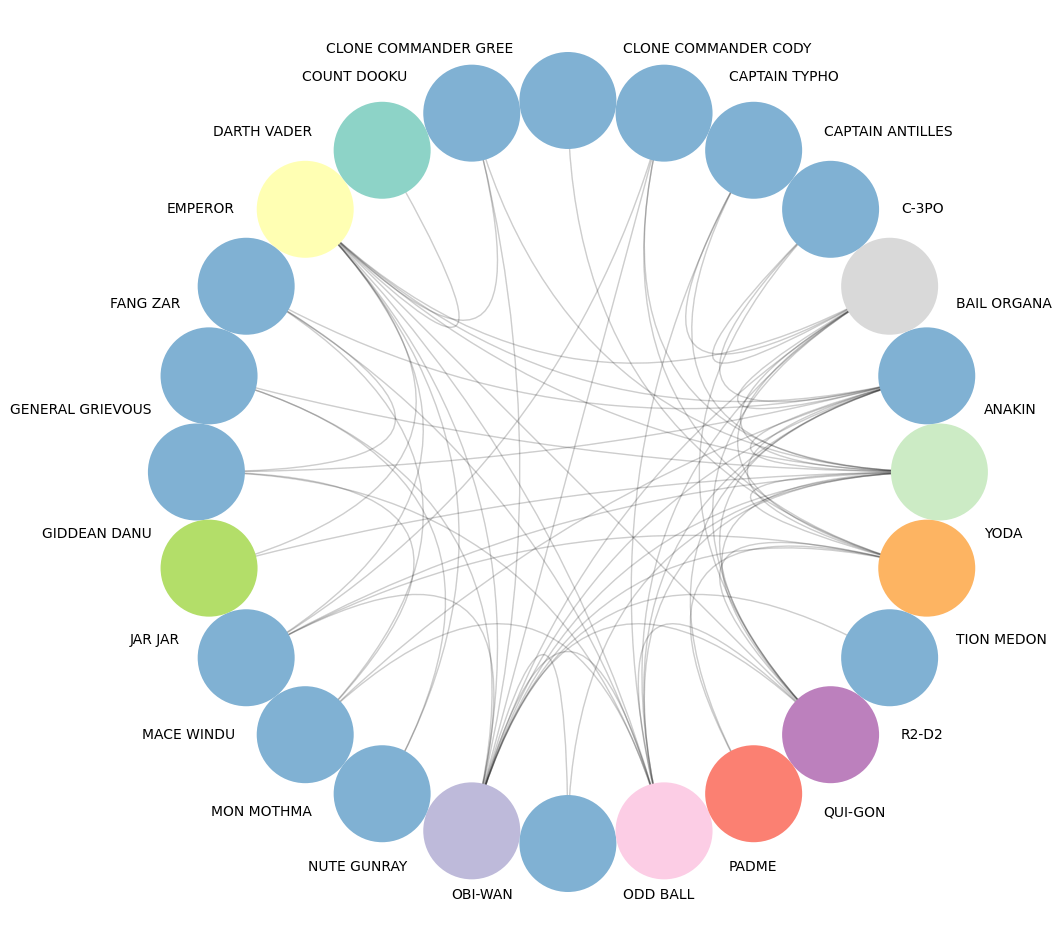

In [20]:
draw_circle_graph(G[2], 'All Characters Network')

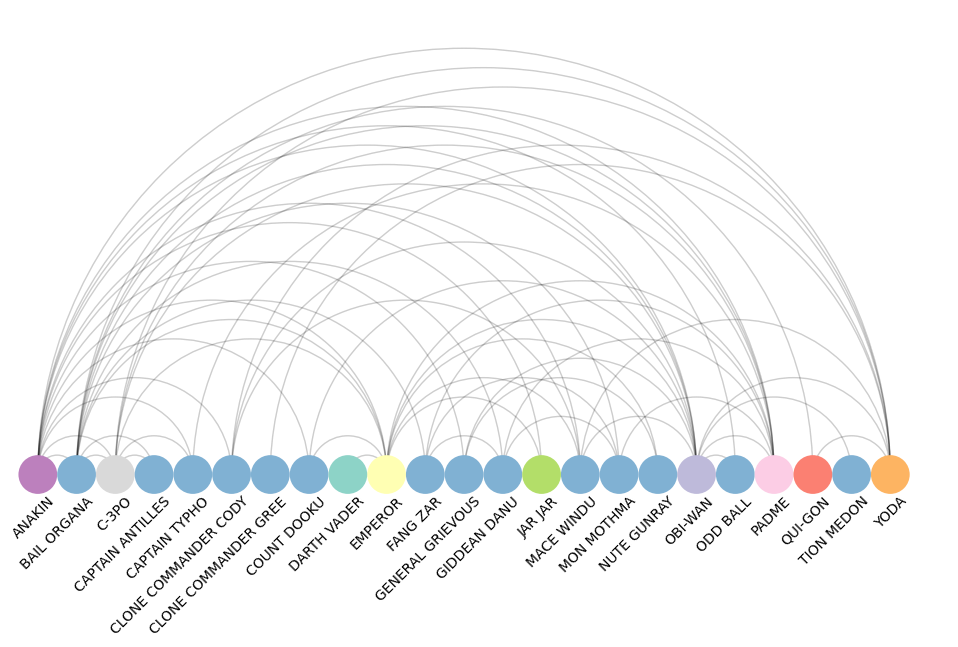

In [21]:
draw_arc_graph(G[0], 'Interactions Network')

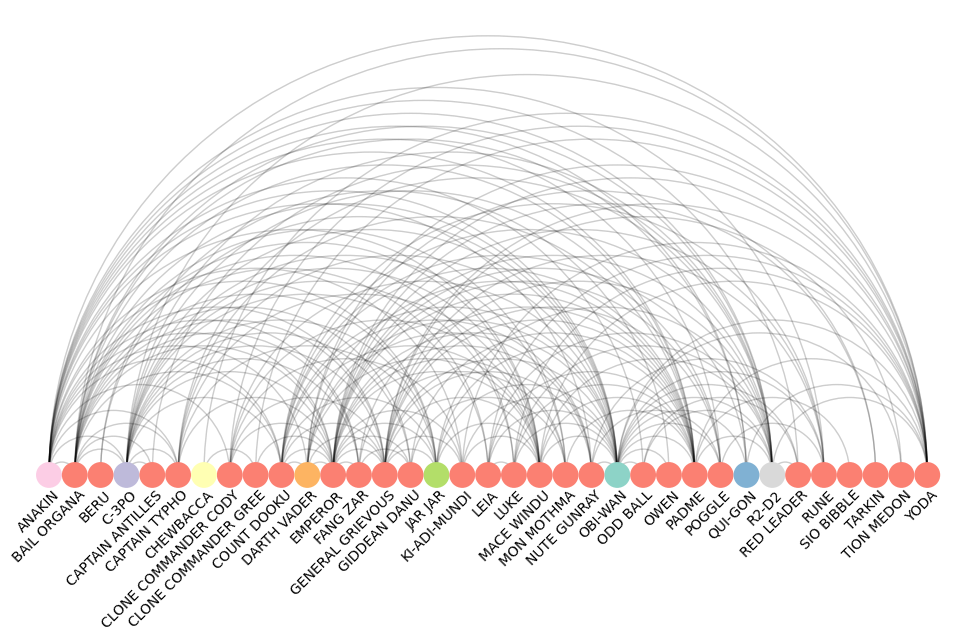

In [22]:
draw_arc_graph(G[1], 'Mentions Network')

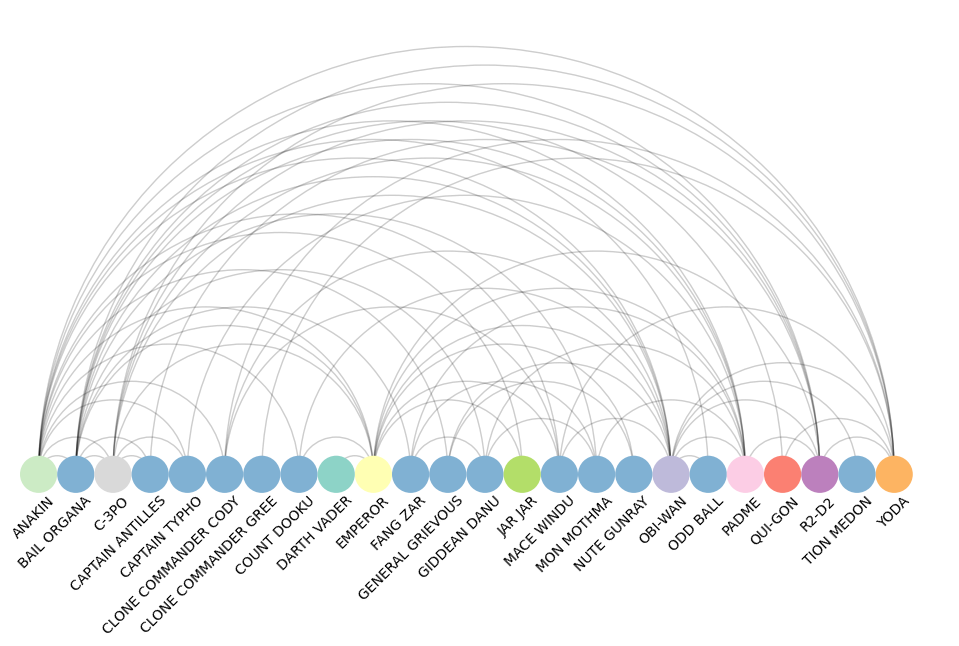

In [23]:
draw_arc_graph(G[2], 'All Characters Network')

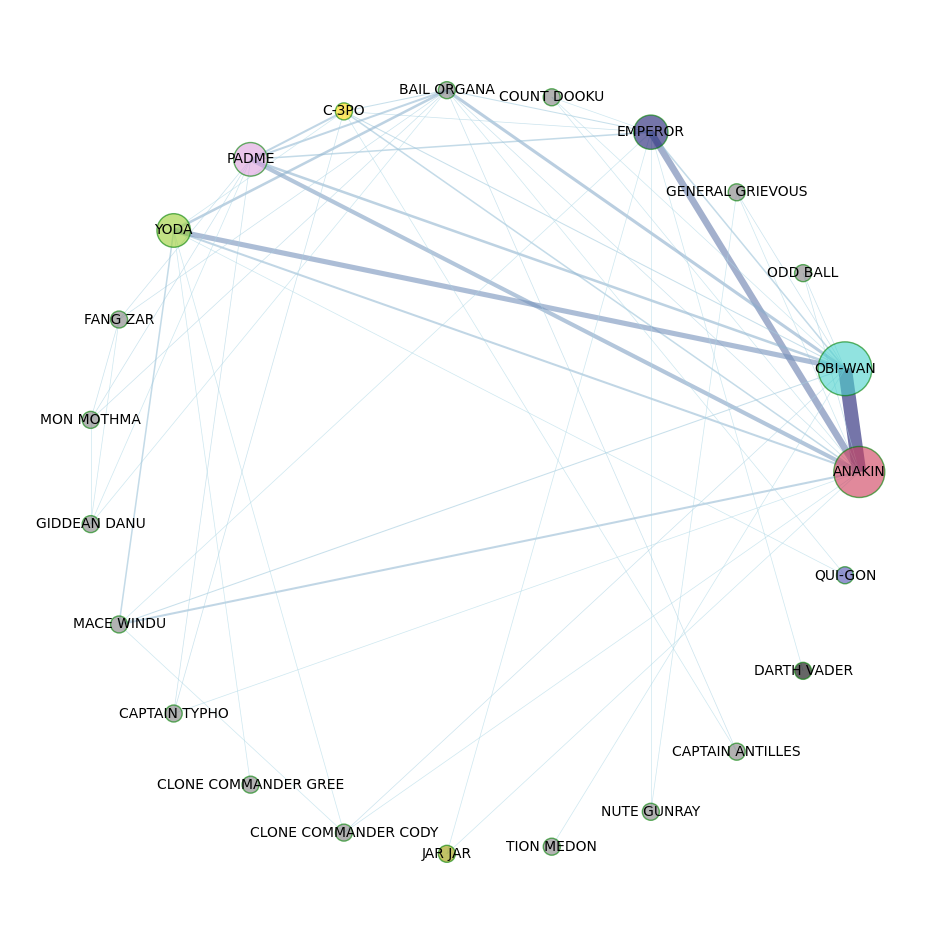

In [24]:
draw_graph_with_features(G[0], size=12)  # Interactions Network

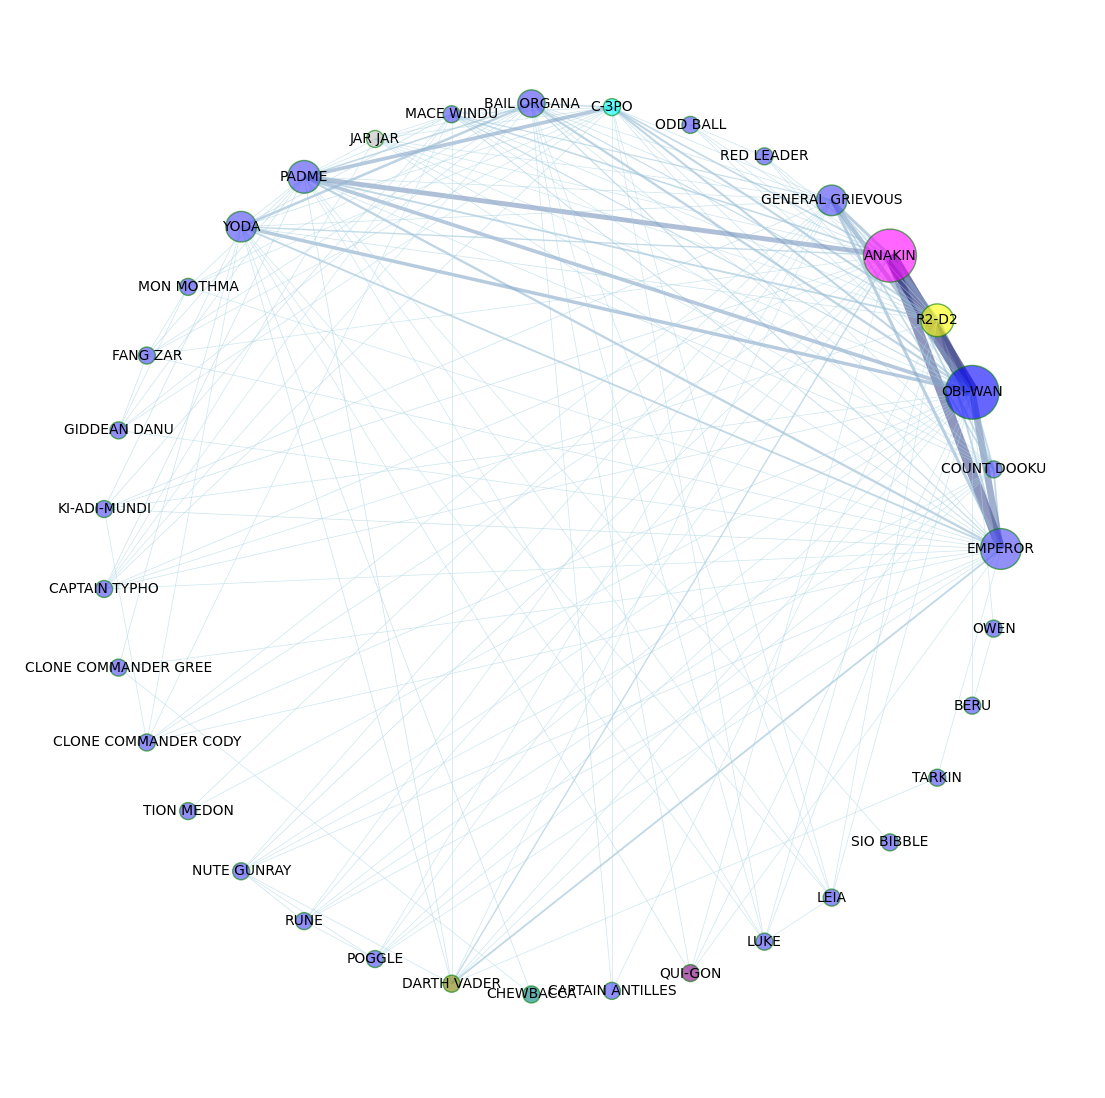

In [25]:
draw_graph_with_features(G[1], size=14)  # Mentions Network

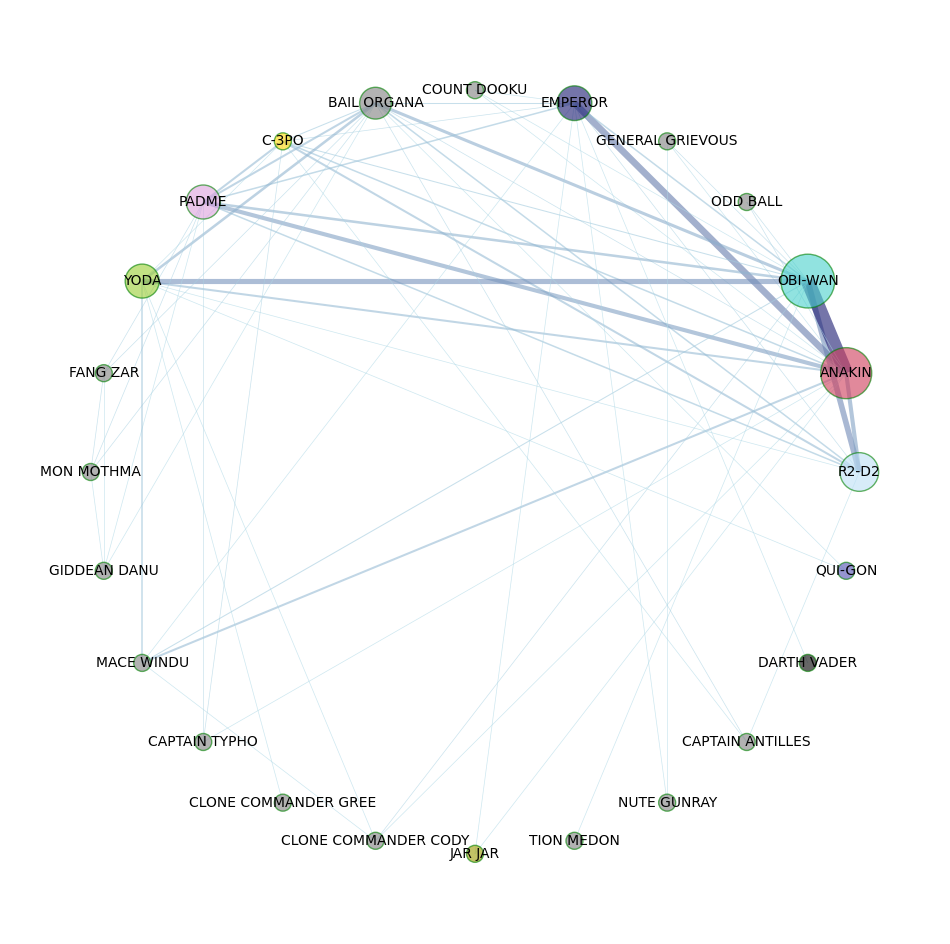

In [26]:
draw_graph_with_features(G[2], size=12)  # All Characters Network

### Degree Analysis <a id="DEGREE"></a>

Now that we've done a visual analysis, let's now do a network analysis using two metrics:
- The *node degree*: is the number of edges adjacent to the node; and
- The *weighted node degree*: is the sum of the edge weights for edges incident to that node.

Let's visualize the distribution of the degree of nodes (with and without weight) with two common techniques: 
- The *degree-rank plot*;
- The *degree histogram*.

In [27]:
def get_degree(G, sort=False, weighted=False):
    degrees = {}
    for node in G.nodes():
        if weighted:
            degrees[node] = G.degree(weight='weight')[node]
        else:
            degrees[node] = G.degree[node]
    if sort:
        degrees = sorted(degrees.items(), key=lambda x: x[1], reverse=True)
    return degrees

def draw_degree_rank(G, title, weighted=False):
    degrees = get_degree(G, sort=False, weighted=weighted)
    degree_sequence = sorted(list(degrees.values()), reverse=True)
    dmax = max(degree_sequence)

    degrees = sorted(degrees.items(), key=lambda x: x[1], reverse=True)
    people = [degrees[x][0] for x in np.arange(0, len(degrees))]
    y_pos = np.arange(len(people))

    fig, ax = plt.subplots(figsize=(20, 8))
    ax.plot(degree_sequence, "b-", marker="o")
    ax.set_title("Degree Rank Plot - " + str(title))
    ax.set_ylabel("Degree")
    ax.set_xlabel("Characters")
    ax.set_xticks(y_pos, labels=people, rotation=80)

    fig.tight_layout()
    plt.show()
    
def draw_degree_hist(G, title, weighted=False):
    fig, ax = plt.subplots(figsize=(20, 8))
    degrees = get_degree(G, sort=False, weighted=weighted)
    degree_sequence = sorted(list(degrees.values()), reverse=True)
    dmax = max(degree_sequence)
    ax.bar(*np.unique(degree_sequence, return_counts=True))
    ax.set_title("Degree histogram - " + str(title))
    ax.set_xlabel("Degree")
    ax.set_ylabel("# of Nodes")
    ax.set_xticks(np.arange(dmax + 1))
    fig.tight_layout()
    plt.show()

In [28]:
# Let"s start by looking at the node degree metric (without using weight)

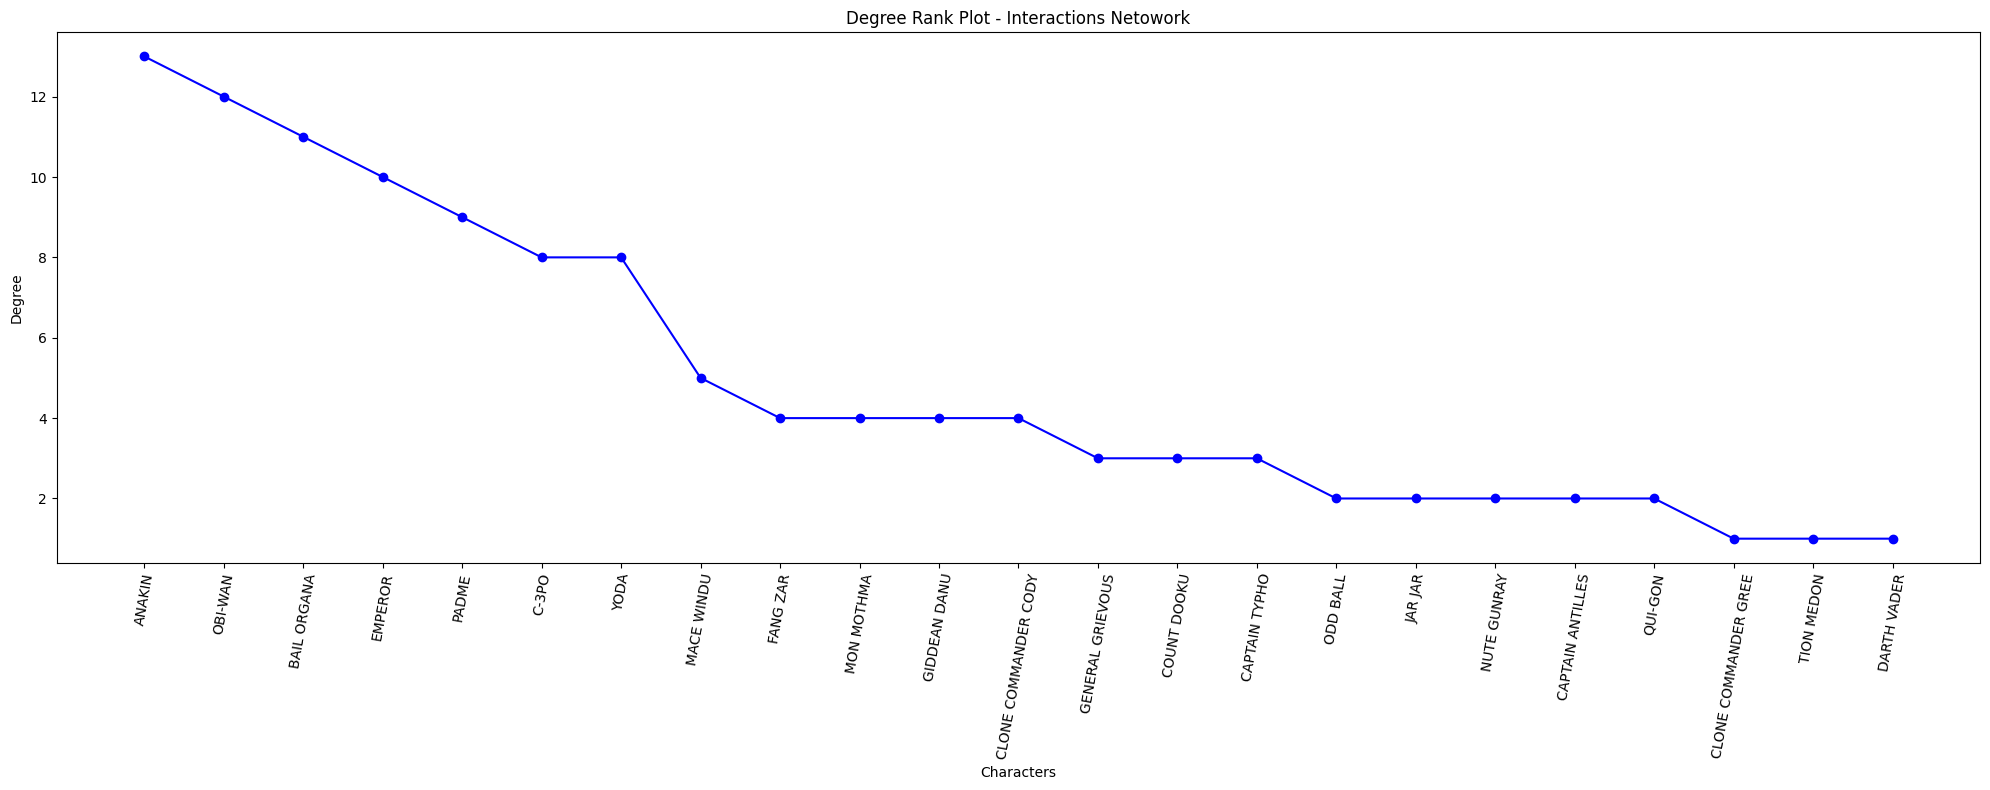

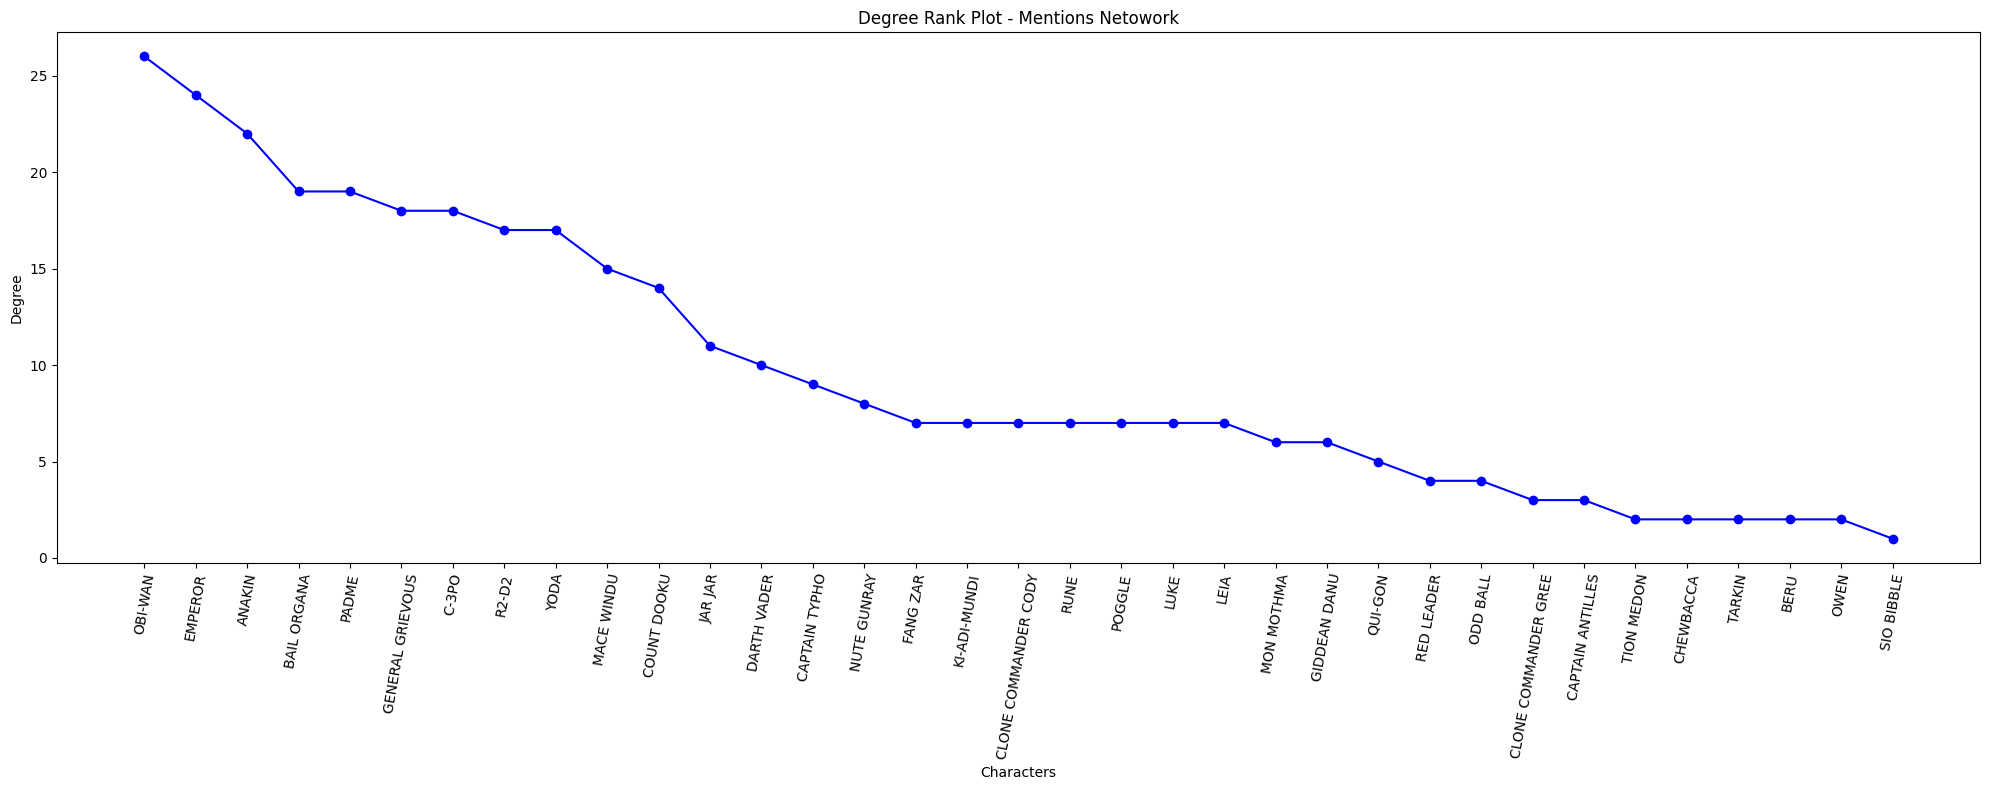

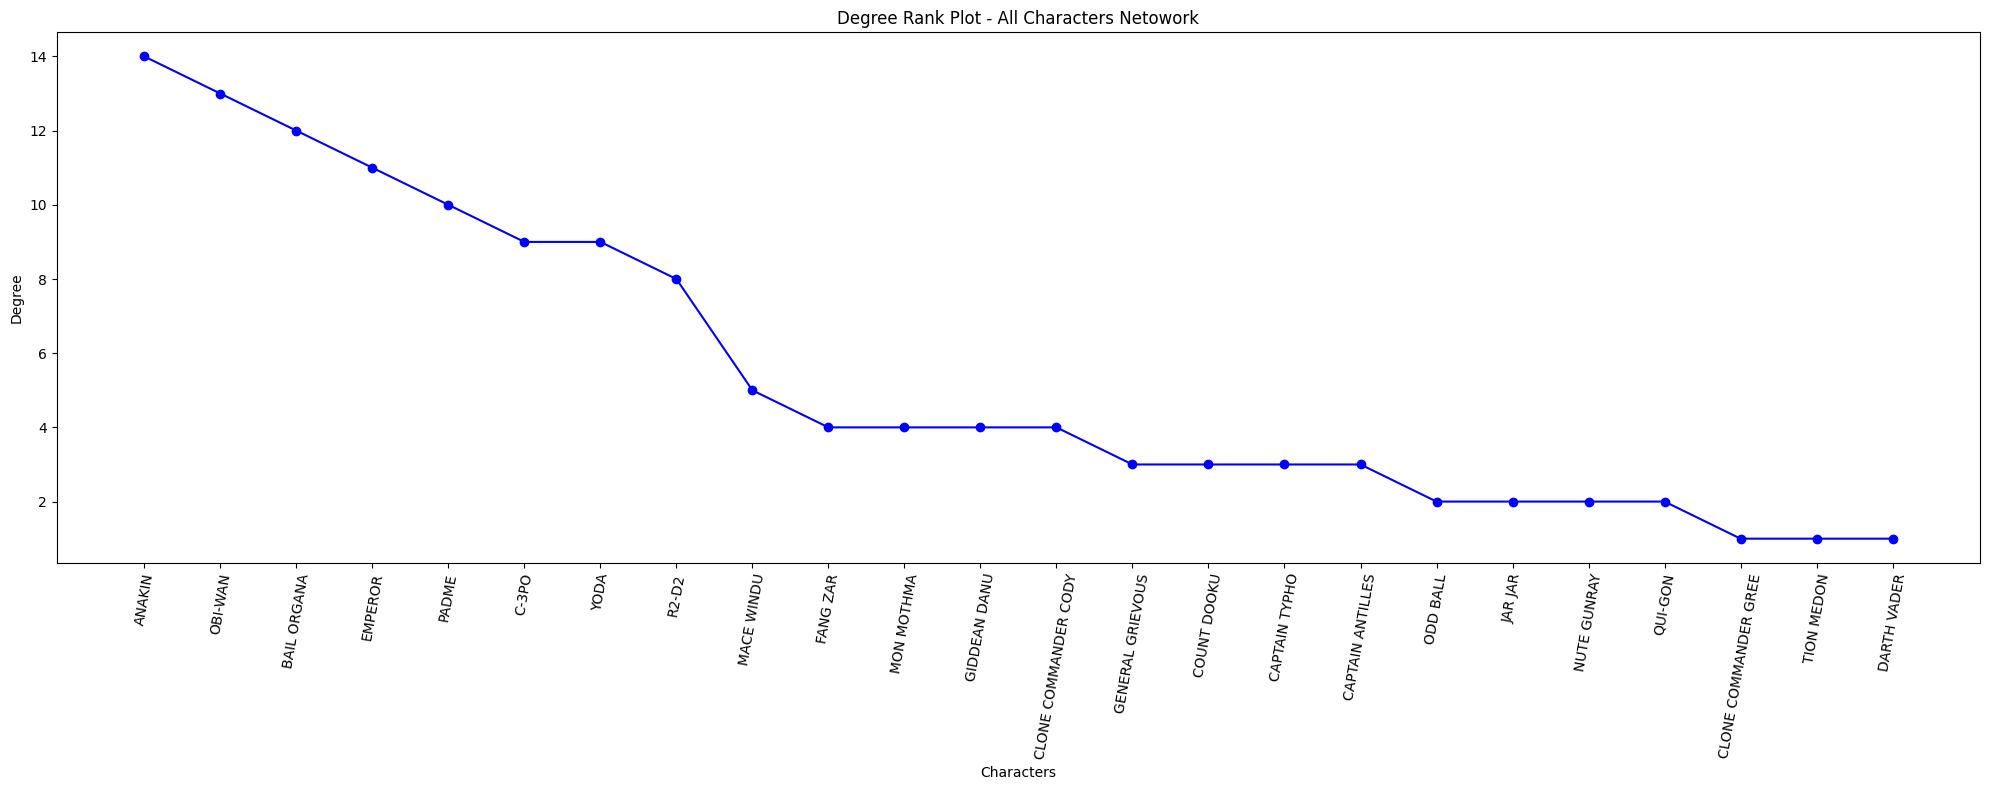

In [29]:
draw_degree_rank(G[0], 'Interactions Netowork')
draw_degree_rank(G[1], 'Mentions Netowork')
draw_degree_rank(G[2], 'All Characters Netowork')

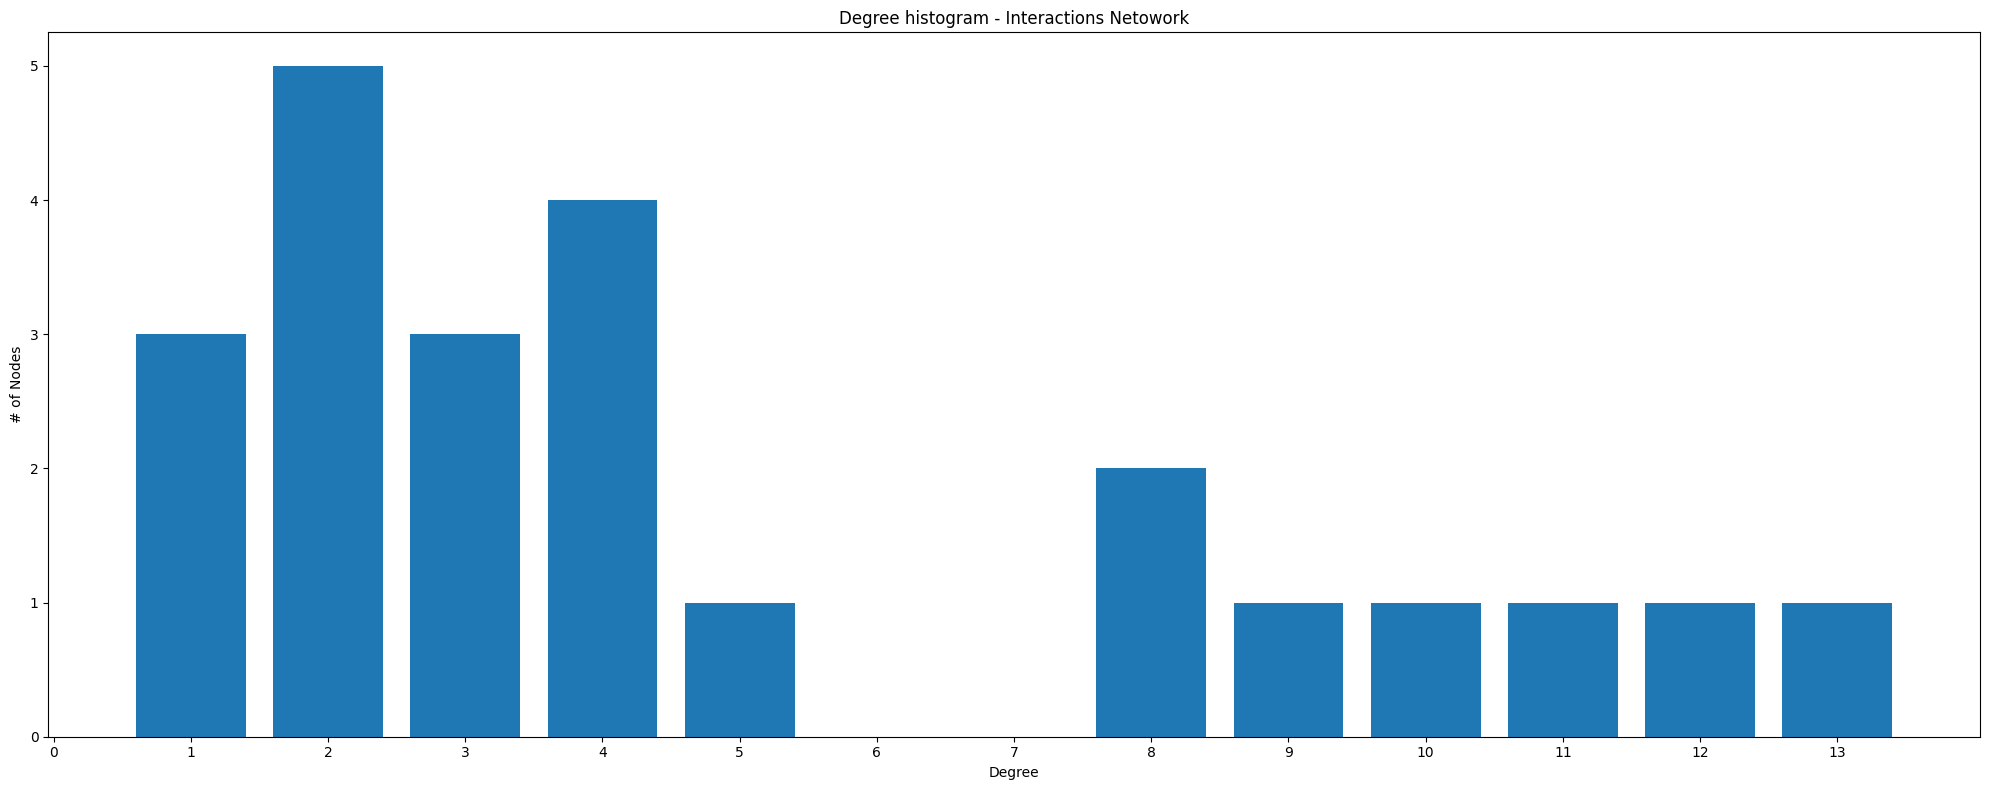

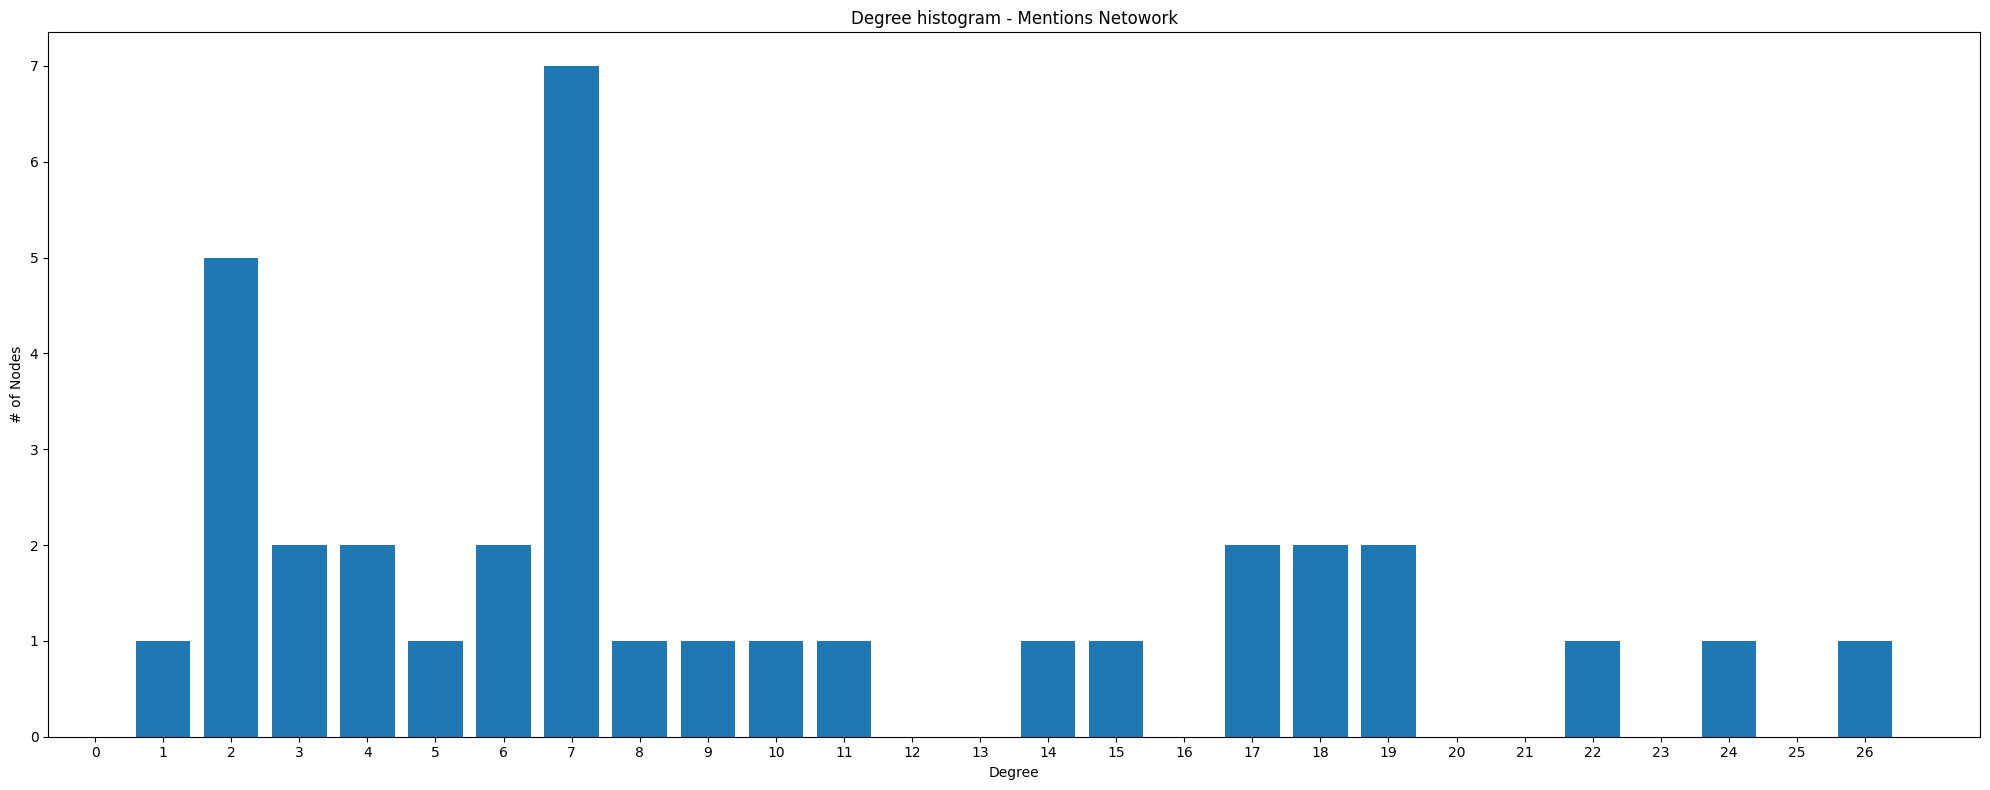

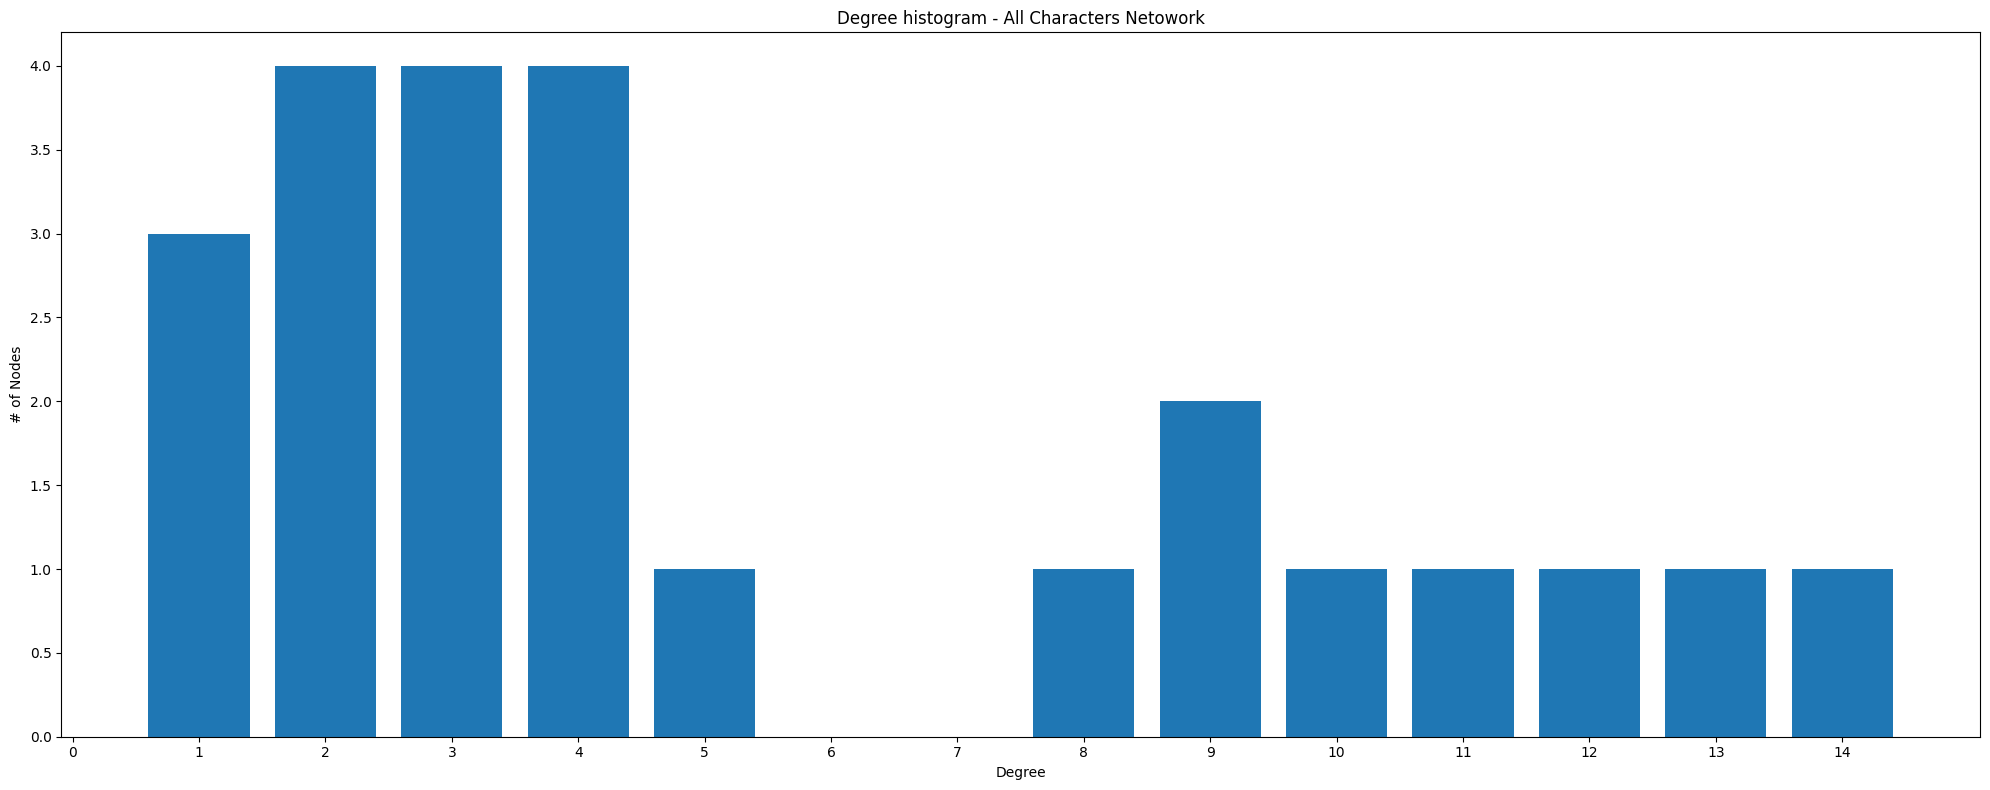

In [30]:
draw_degree_hist(G[0], 'Interactions Netowork')
draw_degree_hist(G[1], 'Mentions Netowork')
draw_degree_hist(G[2], 'All Characters Netowork')

In [31]:
# Now let's see the results for the weighted node degree

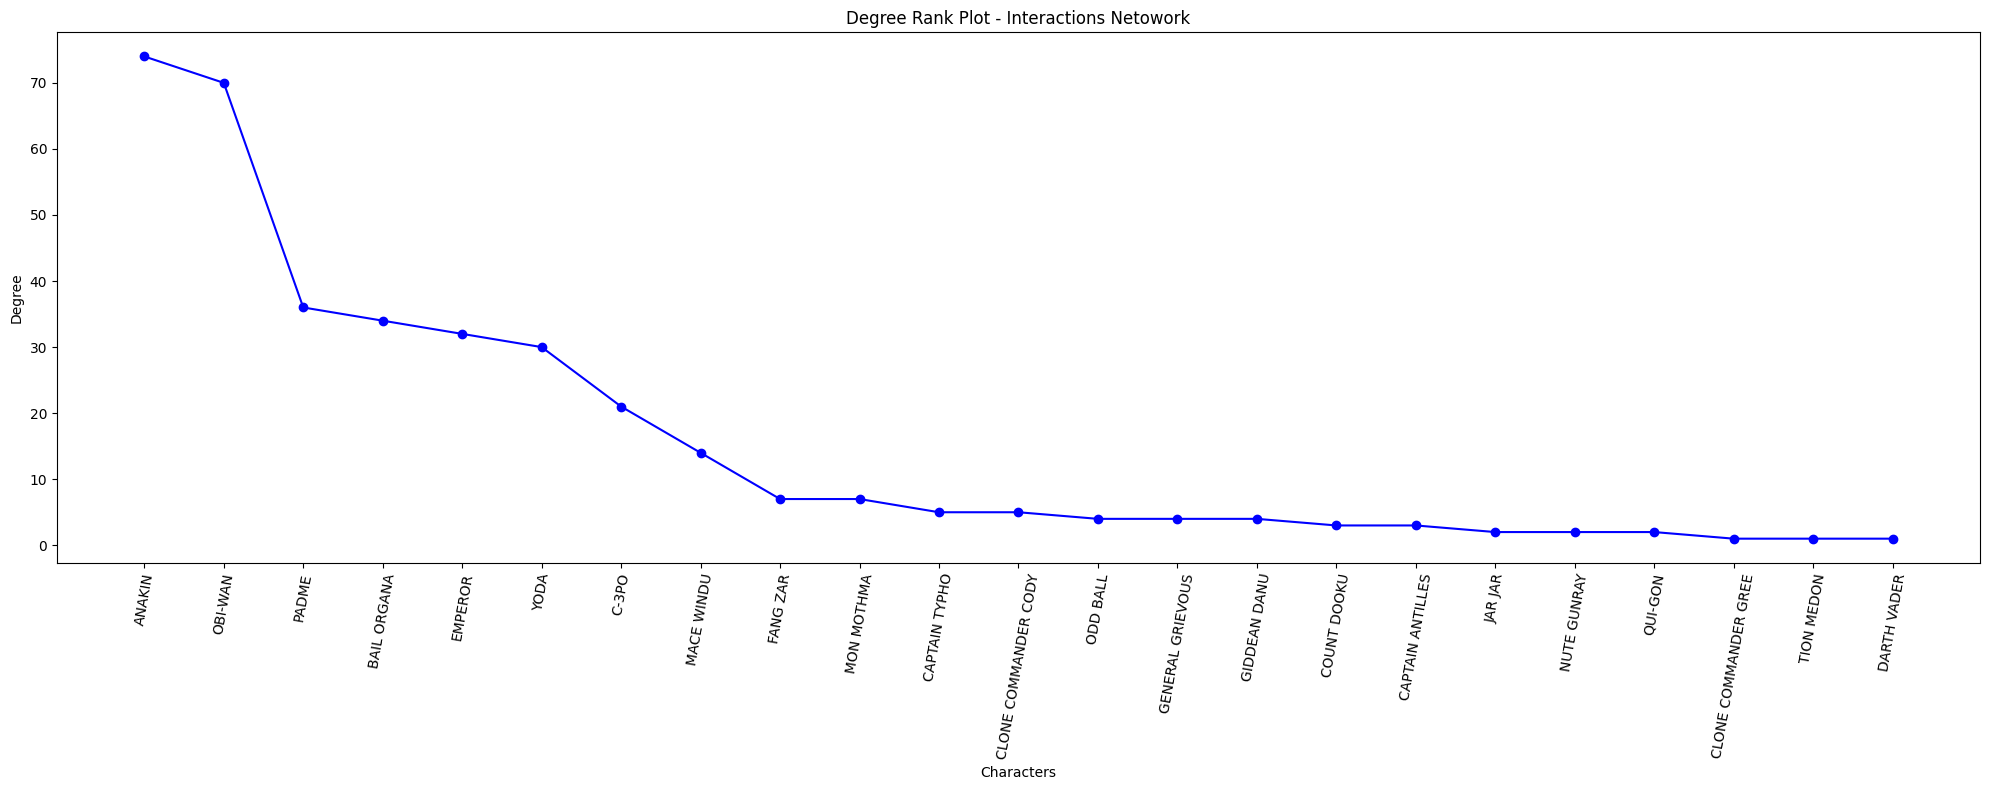

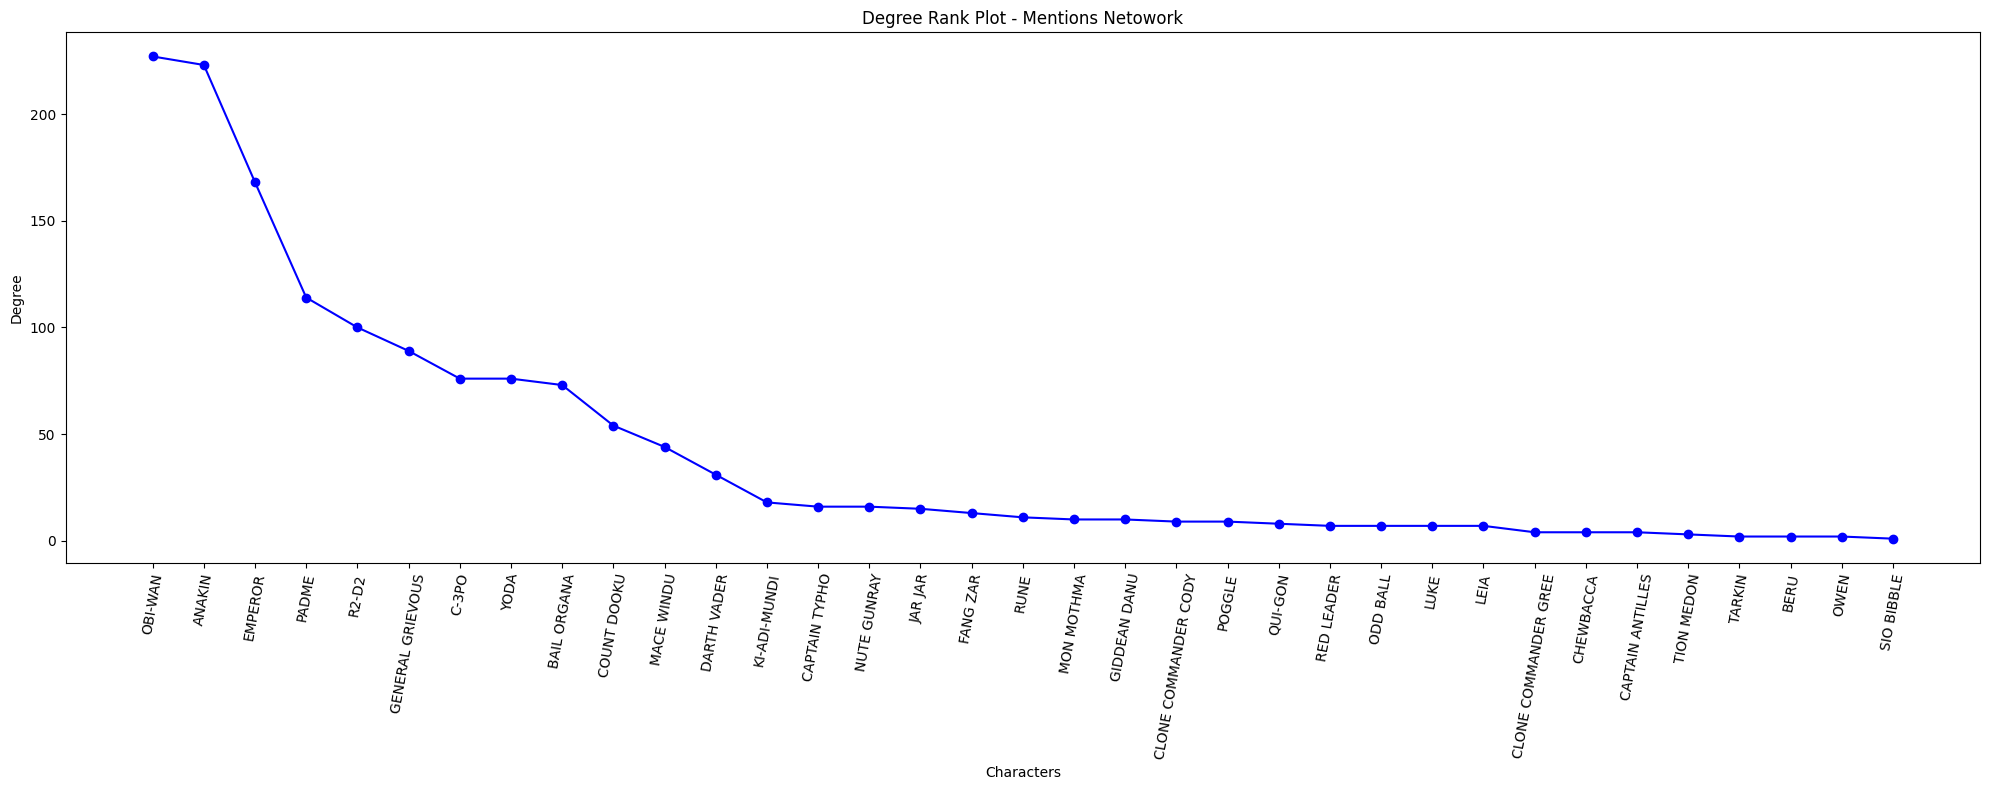

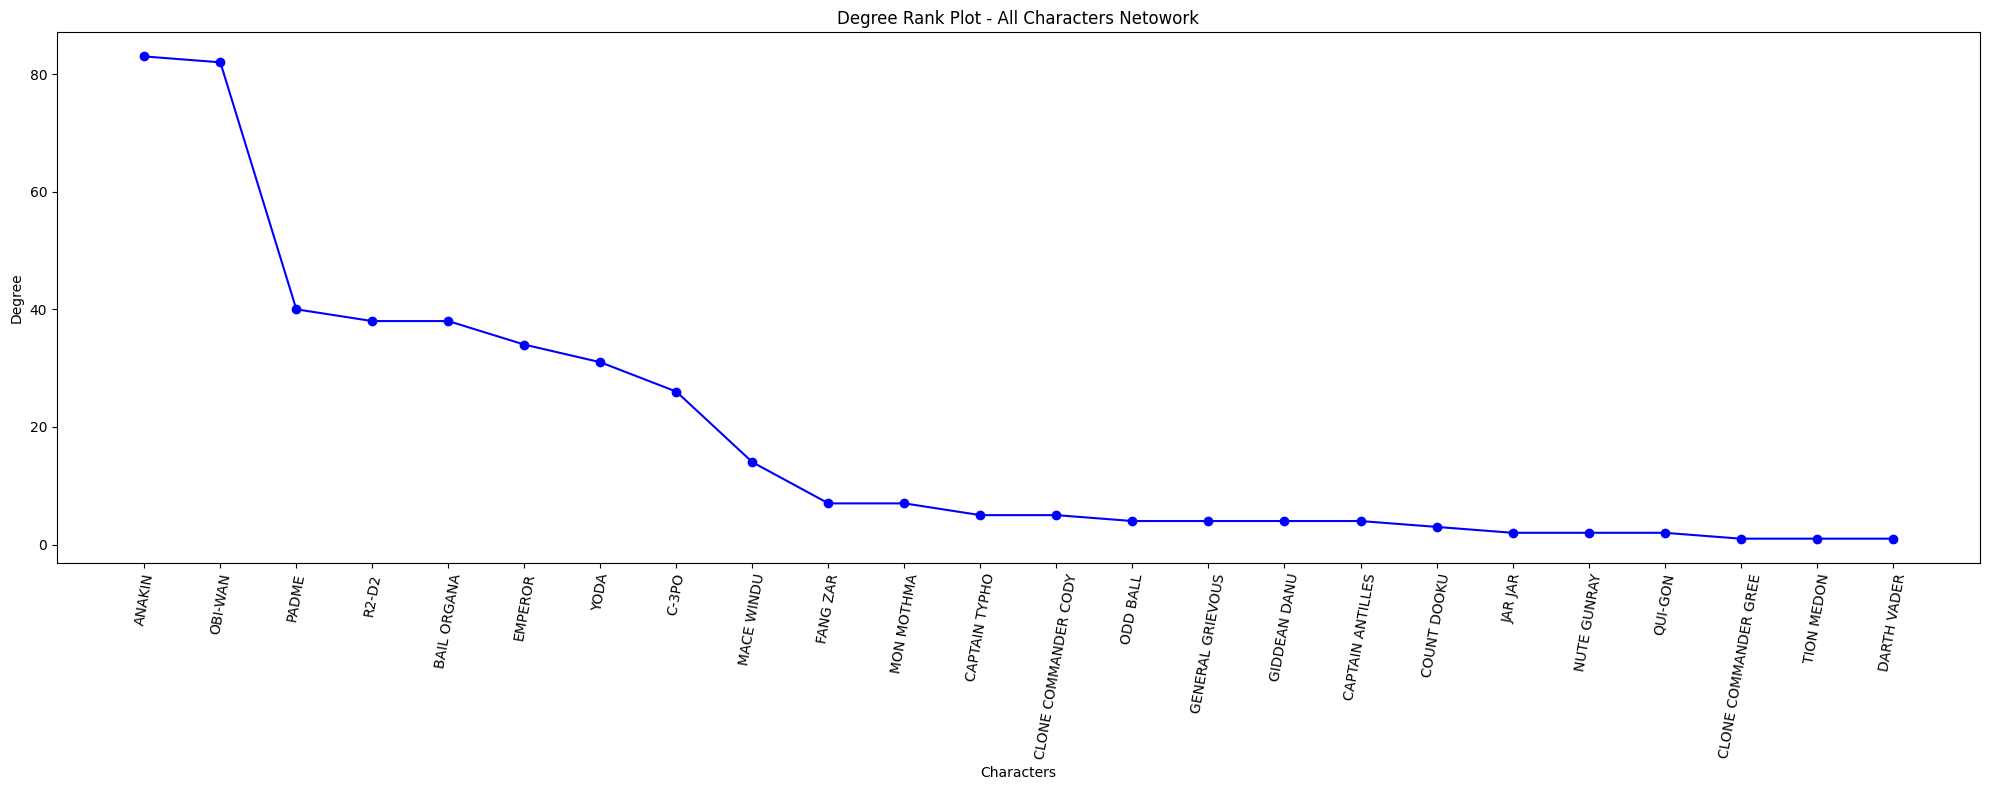

In [32]:
draw_degree_rank(G[0], 'Interactions Netowork', weighted=True)
draw_degree_rank(G[1], 'Mentions Netowork', weighted=True)
draw_degree_rank(G[2], 'All Characters Netowork', weighted=True)

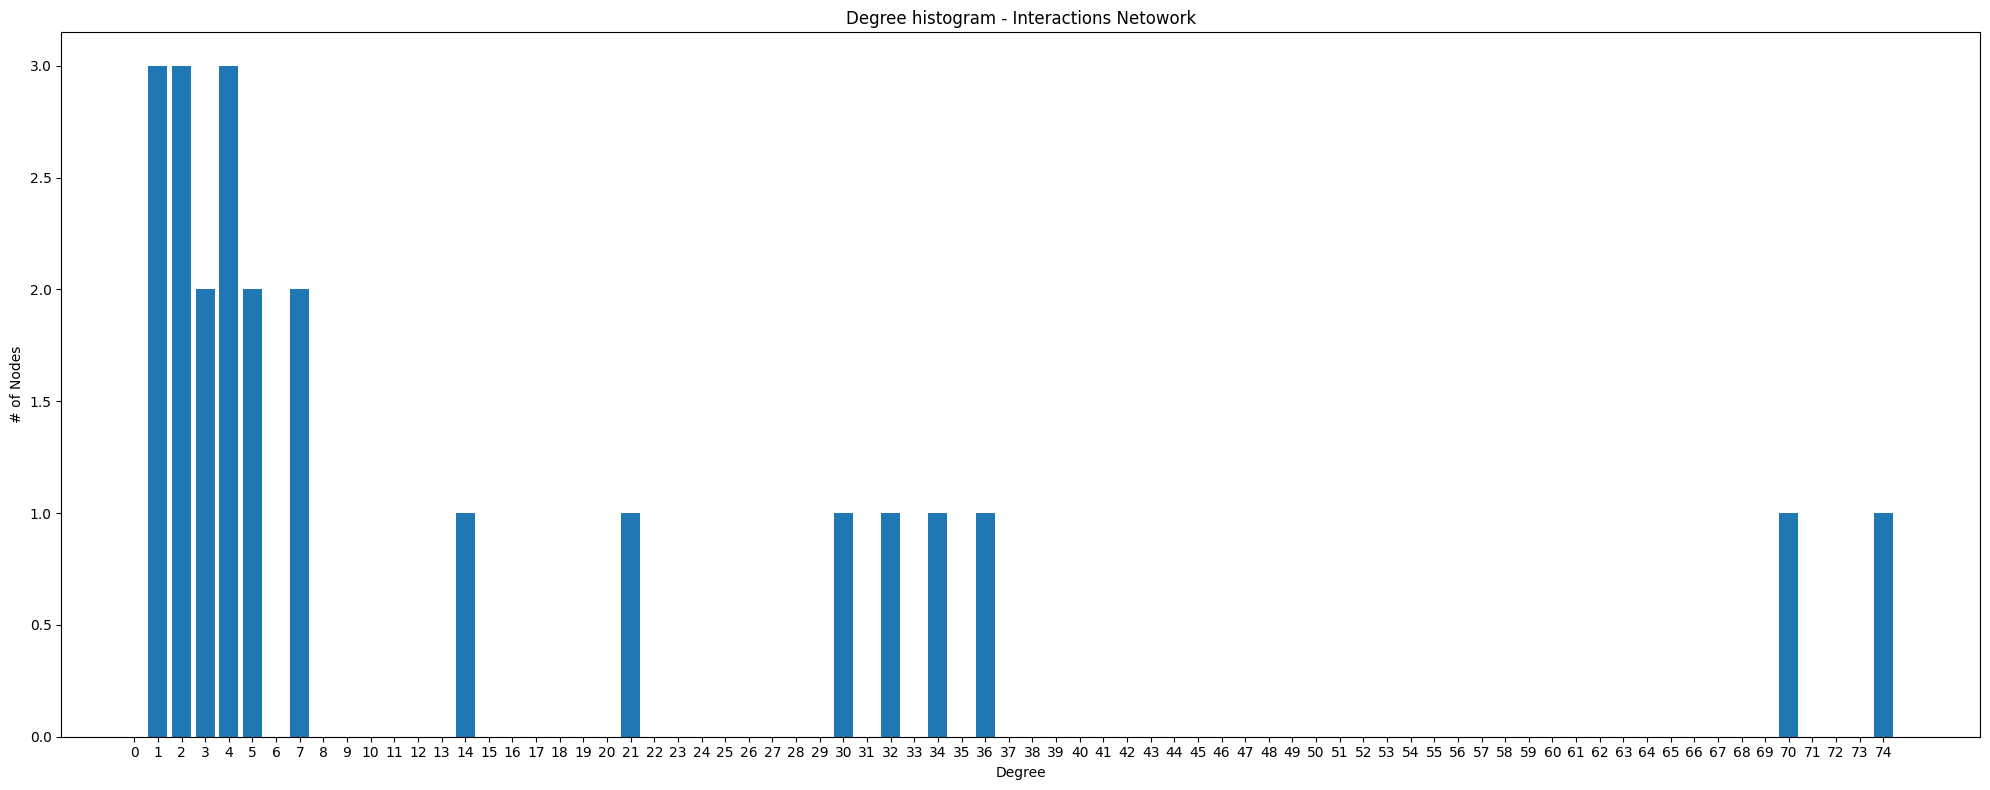

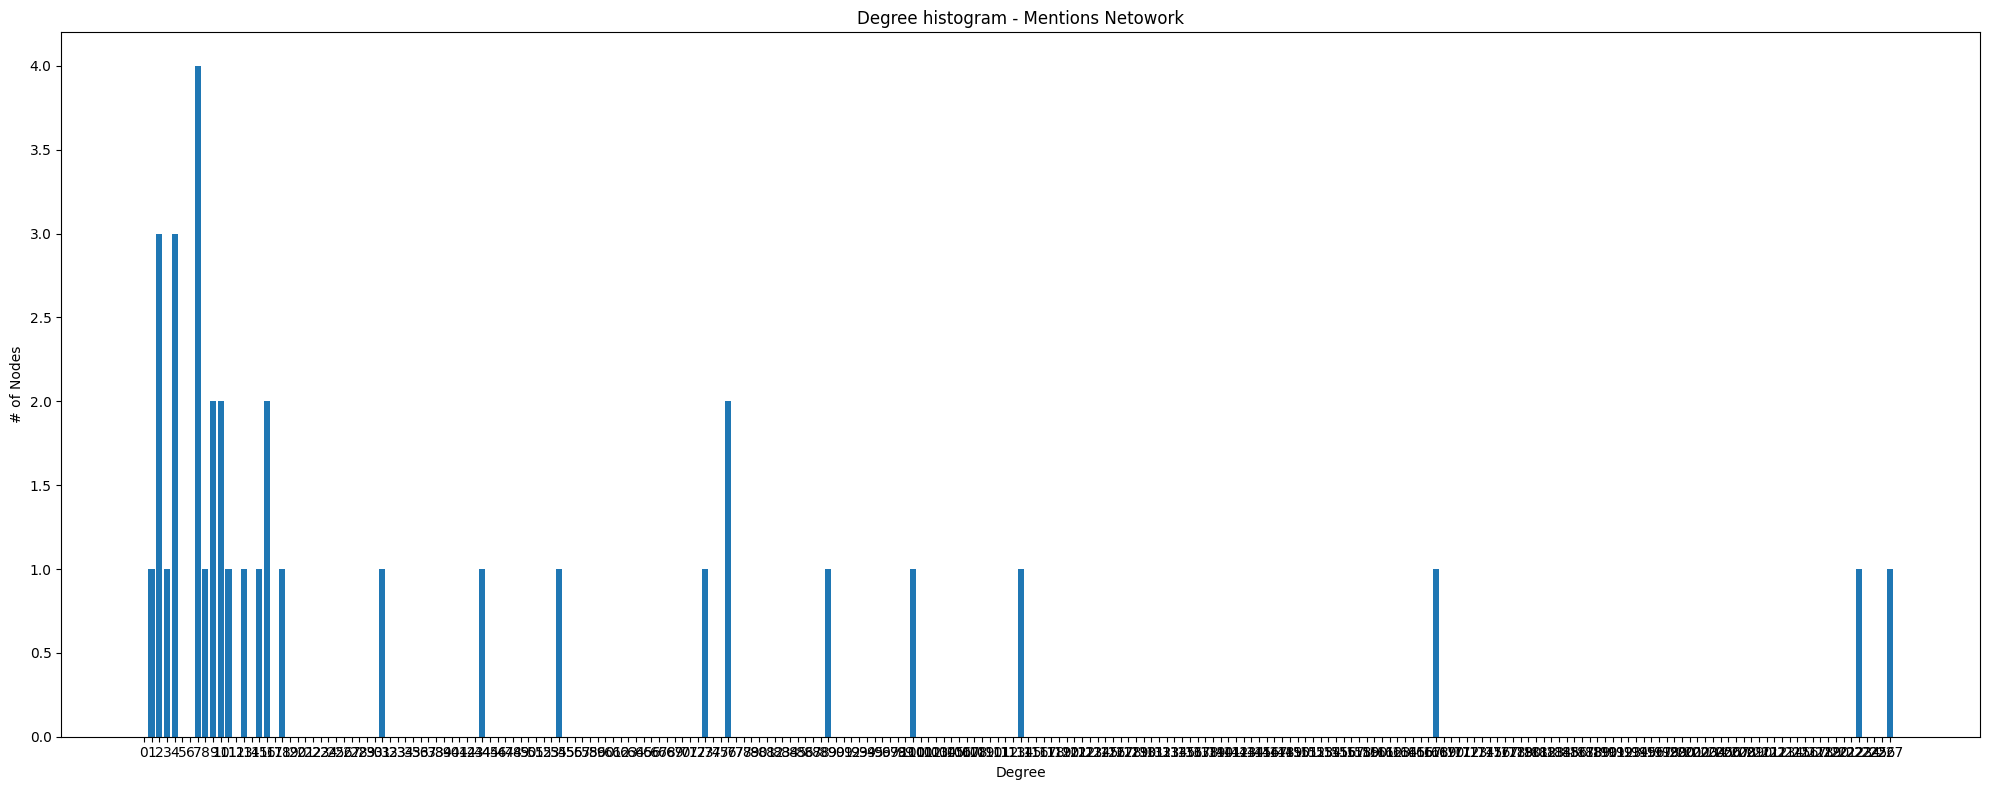

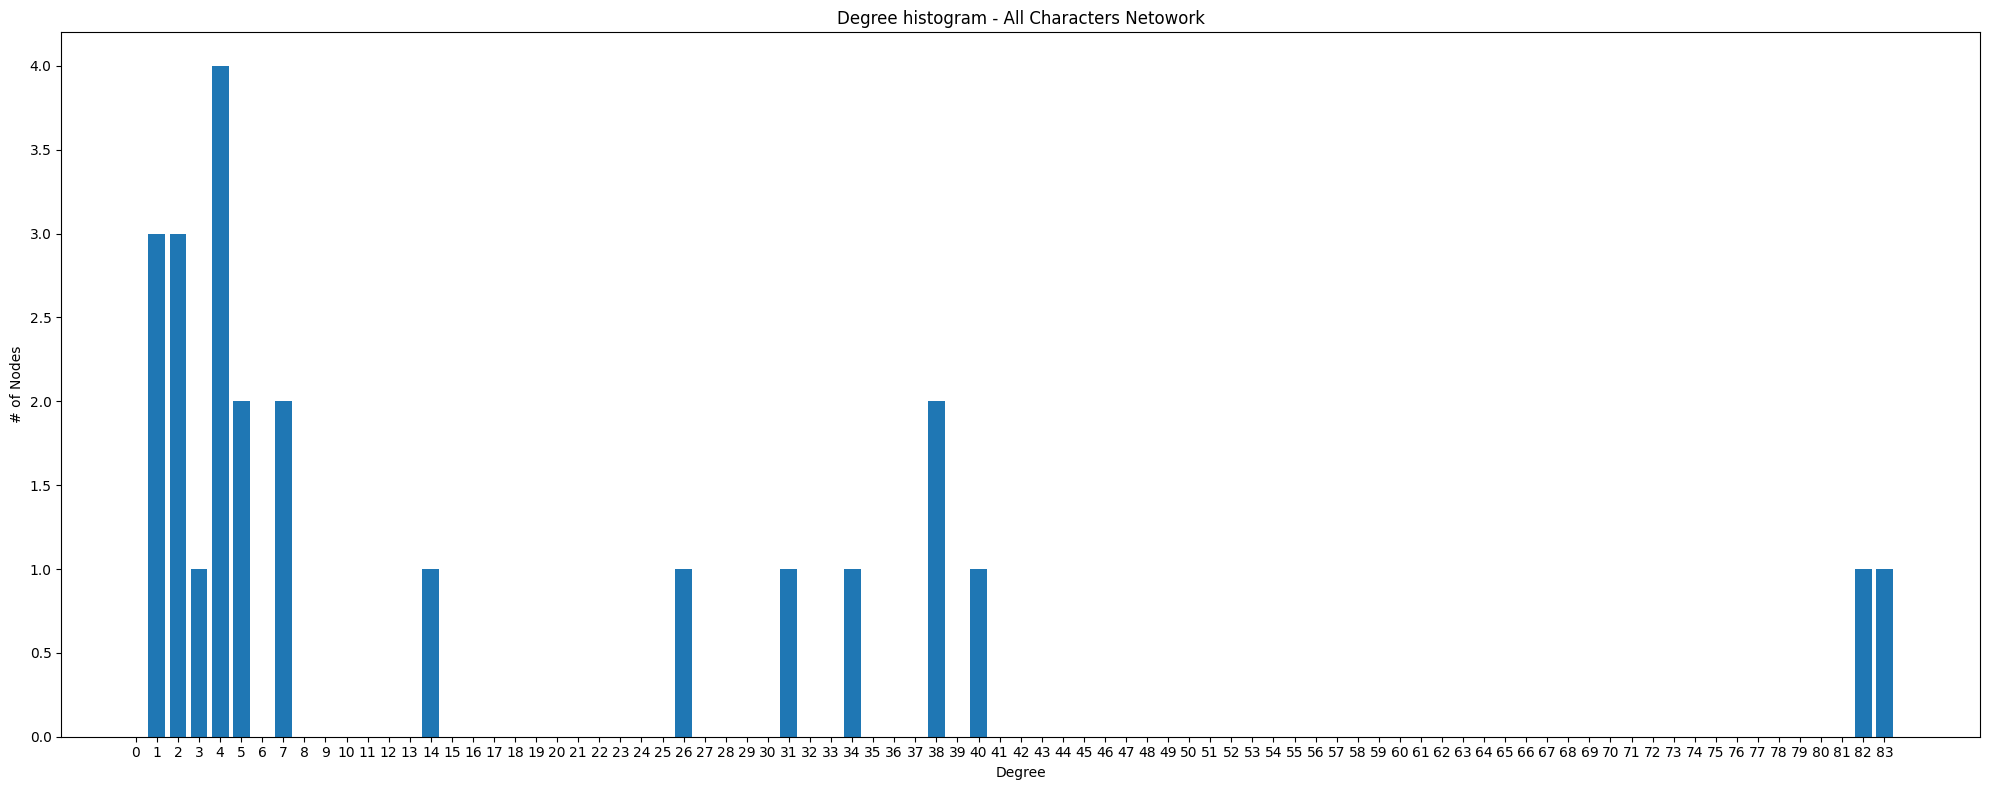

In [33]:
draw_degree_hist(G[0], 'Interactions Netowork', weighted=True)
draw_degree_hist(G[1], 'Mentions Netowork', weighted=True)
draw_degree_hist(G[2], 'All Characters Netowork', weighted=True)

### The 10 nodes with the highest degree <a id="TOP10DEGREE"></a>

In [34]:
# Let's use the top 10 characters with the highest degree (using the weighted metric) to analyze whether there is a difference between the 3 networks

In [35]:
print('Interactions Network:') 
print(get_degree(G[0], sort=True)[:10])

Interactions Network:
[('ANAKIN', 13), ('OBI-WAN', 12), ('BAIL ORGANA', 11), ('EMPEROR', 10), ('PADME', 9), ('C-3PO', 8), ('YODA', 8), ('MACE WINDU', 5), ('FANG ZAR', 4), ('MON MOTHMA', 4)]


In [36]:
print('Mentions Network:') 
print(get_degree(G[1], sort=True)[:10])

Mentions Network:
[('OBI-WAN', 26), ('EMPEROR', 24), ('ANAKIN', 22), ('BAIL ORGANA', 19), ('PADME', 19), ('GENERAL GRIEVOUS', 18), ('C-3PO', 18), ('R2-D2', 17), ('YODA', 17), ('MACE WINDU', 15)]


In [37]:
print('All Characters Network:') 
print(get_degree(G[2], sort=True)[:10])

All Characters Network:
[('ANAKIN', 14), ('OBI-WAN', 13), ('BAIL ORGANA', 12), ('EMPEROR', 11), ('PADME', 10), ('C-3PO', 9), ('YODA', 9), ('R2-D2', 8), ('MACE WINDU', 5), ('FANG ZAR', 4)]


### Average Degree <a id="MEANDEGREE"></a>

Average degree is simply the average number of edges per node in the graph.

In [38]:
def describe_ave_degree(G):
    degrees = get_degree(G, sort=True)
    mean_degree = np.mean(list(dict(degrees).values()))
    print('Mean degree: ', mean_degree)
    characters = [degrees[x] for x in np.arange(0, len(degrees)) if degrees[x][1] >= mean_degree]
    print('Number of characters: ', len(characters))
    print(characters)

In [39]:
describe_ave_degree(G[0])

Mean degree:  4.956521739130435
Number of characters:  8
[('ANAKIN', 13), ('OBI-WAN', 12), ('BAIL ORGANA', 11), ('EMPEROR', 10), ('PADME', 9), ('C-3PO', 8), ('YODA', 8), ('MACE WINDU', 5)]


In [40]:
describe_ave_degree(G[1])

Mean degree:  9.657142857142857
Number of characters:  13
[('OBI-WAN', 26), ('EMPEROR', 24), ('ANAKIN', 22), ('BAIL ORGANA', 19), ('PADME', 19), ('GENERAL GRIEVOUS', 18), ('C-3PO', 18), ('R2-D2', 17), ('YODA', 17), ('MACE WINDU', 15), ('COUNT DOOKU', 14), ('JAR JAR', 11), ('DARTH VADER', 10)]


In [41]:
describe_ave_degree(G[2])

Mean degree:  5.416666666666667
Number of characters:  8
[('ANAKIN', 14), ('OBI-WAN', 13), ('BAIL ORGANA', 12), ('EMPEROR', 11), ('PADME', 10), ('C-3PO', 9), ('YODA', 9), ('R2-D2', 8)]


### Eccentricity Analysis <a id="ECCENTRICITY"></a>

The eccentricity of a node *v* is the maximum distance from *v* to all other nodes in *G*. This means that the smaller the eccentricity of a node, the closer it is to the others.

Using the eccentricity of the nodes, we can calculate three metrics:
- The Network Diameter: is the maximum eccentricity;
- The Network Radius: is the minimum eccentricity;
- The Network Center: is the set of nodes with eccentricity equal to radius.

In [42]:
def report_eccentricity(G, net_name):
    print(net_name)
    print('Diameter: ', nx.diameter(G))
    print('Radius: ', nx.radius(G))
    print('Center: ', nx.center(G))
    characters = sorted(dict(nx.eccentricity(G)).items(), key=lambda x: x[1], reverse=False)
    print('The eccentricity of nodes in ascending order: ', characters)

In [43]:
report_eccentricity(G[0], 'Interactions Network')

Interactions Network
Diameter:  4
Radius:  2
Center:  ['ANAKIN', 'OBI-WAN', 'BAIL ORGANA', 'C-3PO']
The eccentricity of nodes in ascending order:  [('ANAKIN', 2), ('OBI-WAN', 2), ('BAIL ORGANA', 2), ('C-3PO', 2), ('ODD BALL', 3), ('GENERAL GRIEVOUS', 3), ('EMPEROR', 3), ('COUNT DOOKU', 3), ('PADME', 3), ('YODA', 3), ('FANG ZAR', 3), ('MON MOTHMA', 3), ('GIDDEAN DANU', 3), ('MACE WINDU', 3), ('CAPTAIN TYPHO', 3), ('CLONE COMMANDER CODY', 3), ('JAR JAR', 3), ('TION MEDON', 3), ('CAPTAIN ANTILLES', 3), ('QUI-GON', 3), ('CLONE COMMANDER GREE', 4), ('NUTE GUNRAY', 4), ('DARTH VADER', 4)]


In [44]:
report_eccentricity(G[1], 'Mentions Network')

Mentions Network
Diameter:  3
Radius:  2
Center:  ['EMPEROR', 'OBI-WAN', 'R2-D2', 'ANAKIN', 'GENERAL GRIEVOUS', 'C-3PO', 'BAIL ORGANA', 'MACE WINDU', 'PADME', 'YODA']
The eccentricity of nodes in ascending order:  [('EMPEROR', 2), ('OBI-WAN', 2), ('R2-D2', 2), ('ANAKIN', 2), ('GENERAL GRIEVOUS', 2), ('C-3PO', 2), ('BAIL ORGANA', 2), ('MACE WINDU', 2), ('PADME', 2), ('YODA', 2), ('COUNT DOOKU', 3), ('RED LEADER', 3), ('ODD BALL', 3), ('JAR JAR', 3), ('MON MOTHMA', 3), ('FANG ZAR', 3), ('GIDDEAN DANU', 3), ('KI-ADI-MUNDI', 3), ('CAPTAIN TYPHO', 3), ('CLONE COMMANDER GREE', 3), ('CLONE COMMANDER CODY', 3), ('TION MEDON', 3), ('NUTE GUNRAY', 3), ('RUNE', 3), ('POGGLE', 3), ('DARTH VADER', 3), ('CHEWBACCA', 3), ('CAPTAIN ANTILLES', 3), ('QUI-GON', 3), ('LUKE', 3), ('LEIA', 3), ('SIO BIBBLE', 3), ('TARKIN', 3), ('BERU', 3), ('OWEN', 3)]


In [45]:
report_eccentricity(G[2], 'All Characters Network')

All Characters Network
Diameter:  4
Radius:  2
Center:  ['R2-D2', 'ANAKIN', 'OBI-WAN', 'BAIL ORGANA', 'C-3PO']
The eccentricity of nodes in ascending order:  [('R2-D2', 2), ('ANAKIN', 2), ('OBI-WAN', 2), ('BAIL ORGANA', 2), ('C-3PO', 2), ('ODD BALL', 3), ('GENERAL GRIEVOUS', 3), ('EMPEROR', 3), ('COUNT DOOKU', 3), ('PADME', 3), ('YODA', 3), ('FANG ZAR', 3), ('MON MOTHMA', 3), ('GIDDEAN DANU', 3), ('MACE WINDU', 3), ('CAPTAIN TYPHO', 3), ('CLONE COMMANDER CODY', 3), ('JAR JAR', 3), ('TION MEDON', 3), ('CAPTAIN ANTILLES', 3), ('QUI-GON', 3), ('CLONE COMMANDER GREE', 4), ('NUTE GUNRAY', 4), ('DARTH VADER', 4)]


### The most important character in Star Wars Episode 3 <a id="SOLUTIONS"></a>

#### Degree Centrality <a id="DEGREECENT"></a>

The degree centrality for a node *v* is the fraction of nodes it is connected to.

In [46]:
# Let's calculate the degree centrality for all networks and then check the 10 characters with the highest values for the metric.

In [47]:
def get_top10_degree_centrality(G):
    # Calculating the degree centrality
    deg_cen = nx.degree_centrality(G)
    # Sorting the dictionaries
    sorted_deg_cen = sorted(deg_cen.items(), key=lambda x: x[1], reverse=True)
    
    return sorted_deg_cen[:10]    

In [48]:
get_top10_degree_centrality(G[0])

[('ANAKIN', 0.5909090909090909),
 ('OBI-WAN', 0.5454545454545454),
 ('BAIL ORGANA', 0.5),
 ('EMPEROR', 0.4545454545454546),
 ('PADME', 0.4090909090909091),
 ('C-3PO', 0.36363636363636365),
 ('YODA', 0.36363636363636365),
 ('MACE WINDU', 0.2272727272727273),
 ('FANG ZAR', 0.18181818181818182),
 ('MON MOTHMA', 0.18181818181818182)]

In [49]:
get_top10_degree_centrality(G[1])

[('OBI-WAN', 0.7647058823529411),
 ('EMPEROR', 0.7058823529411764),
 ('ANAKIN', 0.6470588235294118),
 ('BAIL ORGANA', 0.5588235294117647),
 ('PADME', 0.5588235294117647),
 ('GENERAL GRIEVOUS', 0.5294117647058824),
 ('C-3PO', 0.5294117647058824),
 ('R2-D2', 0.5),
 ('YODA', 0.5),
 ('MACE WINDU', 0.4411764705882353)]

In [50]:
get_top10_degree_centrality(G[2])

[('ANAKIN', 0.6086956521739131),
 ('OBI-WAN', 0.5652173913043478),
 ('BAIL ORGANA', 0.5217391304347826),
 ('EMPEROR', 0.4782608695652174),
 ('PADME', 0.43478260869565216),
 ('C-3PO', 0.3913043478260869),
 ('YODA', 0.3913043478260869),
 ('R2-D2', 0.34782608695652173),
 ('MACE WINDU', 0.21739130434782608),
 ('FANG ZAR', 0.17391304347826086)]

#### Betweenness Centrality <a id="BETWEENCENT"></a>

Betweenness centrality compute the shortest-path betweenness centrality for nodes.
Betweenness centrality of a node *v* is the sum of the fraction of all-pairs shortest paths that pass through *v*.

In [51]:
def get_top10_betweenness_centrality(G, weighted=False):
    # Calculating the degree centrality
    if weighted:
        betweenness = nx.betweenness_centrality(G, weight='weight')
    else:
        betweenness = nx.betweenness_centrality(G)
    nx.betweenness_centrality(G, weight='weight')
    # Sorting the dictionaries
    sorted_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)
    
    return sorted_betweenness[:10]

In [52]:
get_top10_betweenness_centrality(G[0])

[('BAIL ORGANA', 0.2206349206349207),
 ('OBI-WAN', 0.21130694702123273),
 ('ANAKIN', 0.2101525458668316),
 ('EMPEROR', 0.2052772624201196),
 ('YODA', 0.12948876520305094),
 ('PADME', 0.10433931148216866),
 ('C-3PO', 0.058018965161822304),
 ('GENERAL GRIEVOUS', 0.013945578231292518),
 ('MACE WINDU', 0.008451865594722737),
 ('NUTE GUNRAY', 0.002886002886002886)]

In [53]:
get_top10_betweenness_centrality(G[1])

[('OBI-WAN', 0.23501798755809455),
 ('EMPEROR', 0.15459591408789267),
 ('PADME', 0.09139167922590383),
 ('YODA', 0.0911332577107978),
 ('ANAKIN', 0.07731730044564268),
 ('BAIL ORGANA', 0.05345630305523354),
 ('R2-D2', 0.04678552285504157),
 ('C-3PO', 0.04463277364346882),
 ('GENERAL GRIEVOUS', 0.042741908517309586),
 ('DARTH VADER', 0.015788905093717928)]

In [54]:
get_top10_betweenness_centrality(G[2])

[('OBI-WAN', 0.20325616412572933),
 ('ANAKIN', 0.2015433841520798),
 ('EMPEROR', 0.19989648033126292),
 ('BAIL ORGANA', 0.19840956145303973),
 ('YODA', 0.126463391680783),
 ('PADME', 0.10251270468661774),
 ('C-3PO', 0.04334650856389986),
 ('R2-D2', 0.024967061923583656),
 ('GENERAL GRIEVOUS', 0.012450592885375493),
 ('MACE WINDU', 0.0070487483530961795)]

In [55]:
# Previously we calculated the betweenness centrality considering all links equally.
# However, the links between the nodes have weights (which indicate the number of times that two characters interacted in the same movie scene).
# Let's calculate the centrality again, but considering the node weights in the calculation.

In [56]:
get_top10_betweenness_centrality(G[0], True)

[('ANAKIN', 0.35165945165945156),
 ('BAIL ORGANA', 0.26075036075036073),
 ('EMPEROR', 0.19054834054834055),
 ('YODA', 0.17864357864357863),
 ('CLONE COMMANDER CODY', 0.16262626262626262),
 ('GIDDEAN DANU', 0.11038961038961038),
 ('COUNT DOOKU', 0.10822510822510822),
 ('OBI-WAN', 0.09848484848484848),
 ('C-3PO', 0.08455988455988457),
 ('QUI-GON', 0.06349206349206349)]

In [57]:
get_top10_betweenness_centrality(G[1], True)

[('OBI-WAN', 0.23408100613982963),
 ('EMPEROR', 0.22315731159314045),
 ('JAR JAR', 0.12648081271075926),
 ('R2-D2', 0.10014632574793),
 ('C-3PO', 0.09624575266286498),
 ('CLONE COMMANDER CODY', 0.06407453706918947),
 ('LUKE', 0.06300765485257463),
 ('LEIA', 0.06300765485257463),
 ('PADME', 0.06082392552980787),
 ('CAPTAIN TYPHO', 0.060090657015790694)]

In [58]:
get_top10_betweenness_centrality(G[2], True)

[('ANAKIN', 0.3272727272727272),
 ('BAIL ORGANA', 0.24749670619235836),
 ('YODA', 0.20645586297760213),
 ('EMPEROR', 0.19894598155467721),
 ('CLONE COMMANDER CODY', 0.1623188405797101),
 ('GIDDEAN DANU', 0.10474308300395256),
 ('COUNT DOOKU', 0.10276679841897232),
 ('OBI-WAN', 0.09367588932806324),
 ('QUI-GON', 0.06587615283267458),
 ('C-3PO', 0.05507246376811594)]

#### PageRank of the nodes <a id="PAGERANK"></a>

PageRank computes a ranking of the nodes in the graph G based on the structure of the incoming links. It was originally designed as an algorithm to rank web pages.

In [59]:
def get_top10_pagerank(G):
    pr = nx.pagerank(G, alpha=0.9)
    sorted_pr_ep1 = sorted(pr.items(), key=lambda x: x[1], reverse=True)
    
    return sorted_pr_ep1[:10]

In [60]:
get_top10_pagerank(G[0])

[('ANAKIN', 0.18430318473356647),
 ('OBI-WAN', 0.1768420130225307),
 ('PADME', 0.09306865275542571),
 ('BAIL ORGANA', 0.09169621202240476),
 ('EMPEROR', 0.0867935633118087),
 ('YODA', 0.08018309749975276),
 ('C-3PO', 0.055575744773470964),
 ('MACE WINDU', 0.037308541644523116),
 ('FANG ZAR', 0.023218214591138427),
 ('MON MOTHMA', 0.023218214591138427)]

In [61]:
get_top10_pagerank(G[1])

[('OBI-WAN', 0.14230199556337267),
 ('ANAKIN', 0.13560106368783195),
 ('EMPEROR', 0.10449558929264915),
 ('PADME', 0.0738705341737302),
 ('R2-D2', 0.06231067690901258),
 ('GENERAL GRIEVOUS', 0.05652045493473245),
 ('YODA', 0.05250551356695417),
 ('BAIL ORGANA', 0.04963480797115418),
 ('C-3PO', 0.049194079813033045),
 ('COUNT DOOKU', 0.03440463889855559)]

In [62]:
get_top10_pagerank(G[2])

[('ANAKIN', 0.17171393419624714),
 ('OBI-WAN', 0.17151286041616104),
 ('PADME', 0.08587903009345231),
 ('BAIL ORGANA', 0.08473092786659916),
 ('R2-D2', 0.07777864143539721),
 ('EMPEROR', 0.07755514405061369),
 ('YODA', 0.06994401896351064),
 ('C-3PO', 0.055937219761703266),
 ('MACE WINDU', 0.031795311243152324),
 ('FANG ZAR', 0.020247032056777723)]

#### Correlation between different measures <a id="CORR"></a>

In [63]:
def corr_measures(G):
    # Creating a list of degree centrality, betweenness centrality and pagerank 
    measures = [nx.degree_centrality(G),
                nx.betweenness_centrality(G), 
                nx.betweenness_centrality(G, weight='weight'), 
                nx.pagerank(G), 
            ]
    # Creating the correlation DataFrame
    cor = pd.DataFrame.from_records(measures, index=['degree_centrality', 'betweenness_centrality',
                                                  'betweenness_centrality_weight', 'pagerank'])

    # Calculating the correlation
    return cor

In [64]:
correlations = []

In [65]:
correlations.append(corr_measures(G[0]))
correlations[0].T.corr()

degree_centrality  betweenness_centrality  \
degree_centrality                       1.000000                0.937215   
betweenness_centrality                  0.937215                1.000000   
betweenness_centrality_weight           0.751503                0.756466   
pagerank                                0.944374                0.918155   

                               betweenness_centrality_weight  pagerank  
degree_centrality                                   0.751503  0.944374  
betweenness_centrality                              0.756466  0.918155  
betweenness_centrality_weight                       1.000000  0.682922  
pagerank                                            0.682922  1.000000

In [66]:
correlations.append(corr_measures(G[1]))
correlations[1].T.corr()

degree_centrality  betweenness_centrality  \
degree_centrality                       1.000000                0.822909   
betweenness_centrality                  0.822909                1.000000   
betweenness_centrality_weight           0.667516                0.755702   
pagerank                                0.905290                0.911919   

                               betweenness_centrality_weight  pagerank  
degree_centrality                                   0.667516  0.905290  
betweenness_centrality                              0.755702  0.911919  
betweenness_centrality_weight                       1.000000  0.638818  
pagerank                                            0.638818  1.000000

In [67]:
correlations.append(corr_measures(G[2]))
correlations[2].T.corr()

degree_centrality  betweenness_centrality  \
degree_centrality                       1.000000                0.919389   
betweenness_centrality                  0.919389                1.000000   
betweenness_centrality_weight           0.705546                0.755801   
pagerank                                0.938198                0.893973   

                               betweenness_centrality_weight  pagerank  
degree_centrality                                   0.705546  0.938198  
betweenness_centrality                              0.755801  0.893973  
betweenness_centrality_weight                       1.000000  0.627630  
pagerank                                            0.627630  1.000000

### Conclusion <a id="CONCLUSION"></a>

#### Who is the most important character in each metric?

In [68]:
# Collecting the most important characters
value_counts = {}

# Iterating through the three networks (Interactions, Mentions, All Characters)
for i, network_name in enumerate(["Interactions", "Mentions", "All Characters"]):
    print(f"\nMost important characters in {network_name} Network:")
    
    # Extracting the top characters based on each metric
    top_characters = correlations[i].idxmax(axis=1)
    for metric, character in top_characters.items():
        print(f"{metric}: {character}")
        
        # Counting how many times each character appears across all metrics
        if character in value_counts:
            value_counts[character] += 1
        else:
            value_counts[character] = 1

#  Creating a DataFrame to summarize the results
value_counts_df = pd.DataFrame(list(value_counts.items()), columns=["Character", "Count"]).sort_values(by="Count", ascending=False)

# Print Summary
print("\n\nSummary of the most important characters across all metrics and networks:\n")
print(value_counts_df.to_string(index=False))


Most important characters in Interactions Network:
degree_centrality: ANAKIN
betweenness_centrality: BAIL ORGANA
betweenness_centrality_weight: ANAKIN
pagerank: ANAKIN

Most important characters in Mentions Network:
degree_centrality: OBI-WAN
betweenness_centrality: OBI-WAN
betweenness_centrality_weight: OBI-WAN
pagerank: OBI-WAN

Most important characters in All Characters Network:
degree_centrality: ANAKIN
betweenness_centrality: OBI-WAN
betweenness_centrality_weight: ANAKIN
pagerank: OBI-WAN


Summary of the most important characters across all metrics and networks:

  Character  Count
    OBI-WAN      6
     ANAKIN      5
BAIL ORGANA      1


**With the results we found, Obi-Wan is the most important character in the movie!**

![Obi-Wan](data/Obi-Wan.jpg)

In [69]:
# May the Force be with you